In [273]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np
from matplotlib import ticker


figuresDir='/Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/'

plt.rc('font', family='sans-serif')
dpi_resolution=300
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')
default_cycler = cycler(linestyle=['-'])



<IPython.core.display.Javascript object>


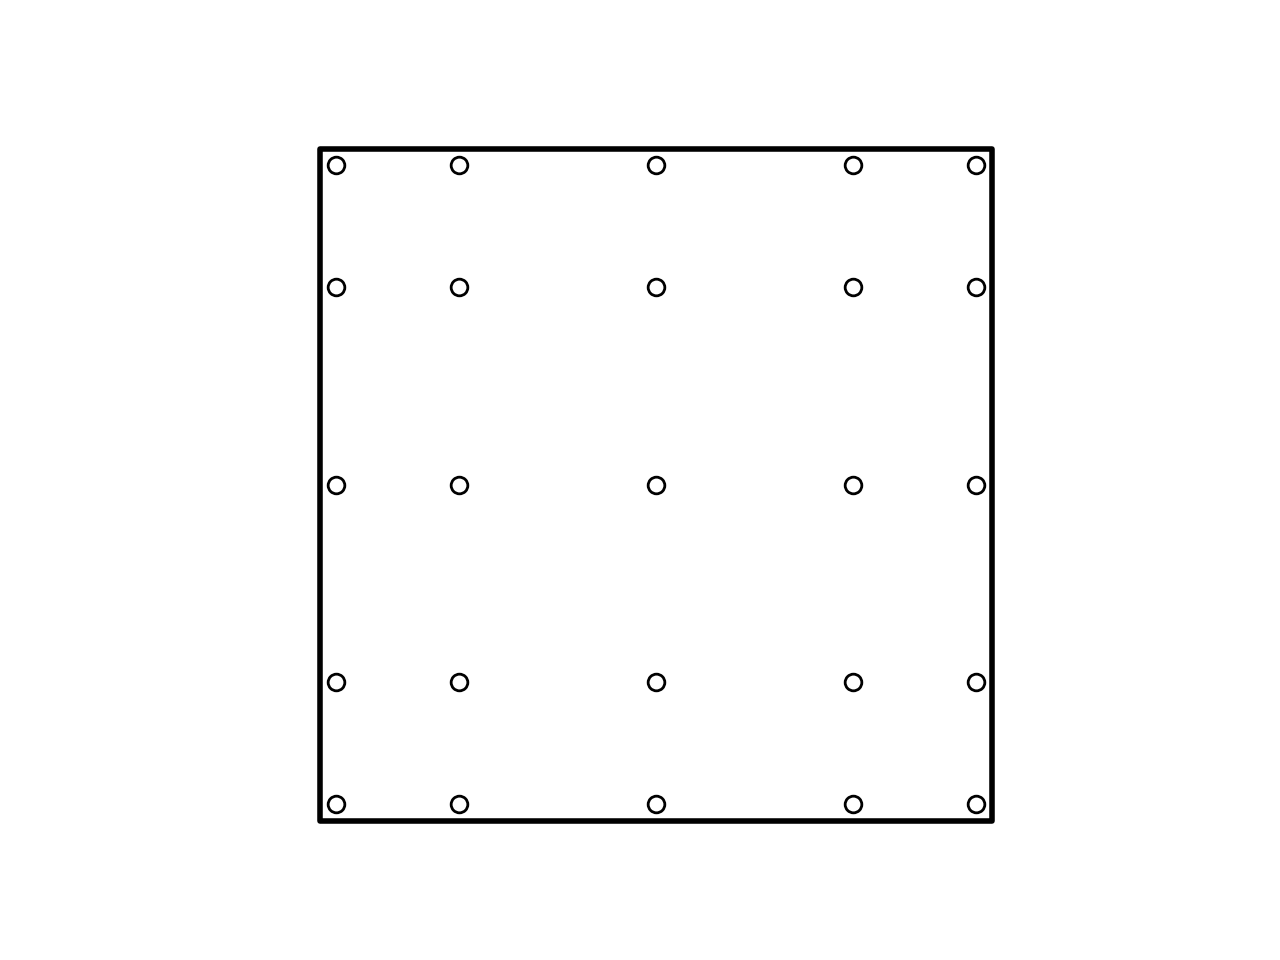

In [108]:
## Figure 1: 2d-quadrature

## Cluster diagram
# import matplotlib.pyplot as plt
# import matplotlib.collections
# import numpy as np
    
def showQuadrature(nodes, elements, values, quadPointsX, quadPointsY,save=False):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_facecolor('none')
#         pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots()
    plt.rc('axes', prop_cycle=default_cycler)
    ax.set_aspect('equal')


    pc = quatplot(y,z, np.asarray(elements), values, ax=ax, 
             edgecolor="k",linewidth=2, cmap="rainbow")
    ax.plot(quadPointsX,quadPointsY,marker='o', fillstyle='none',color='k', ls='')
#     print(quadPointsX)
#     print(quadPointsY)
#     ax.plot(quadPointsX,quadPointsY,marker='o',color='k', ls='')
    plt.axis('off')
#     ax.set(title='This is the plot for: quad', xlabel='Y Axis', ylabel='Z Axis')

    if save != False:
        plt.savefig(figuresDir+save+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()
    return
    
def addPoints1stKind(xPoints, yPoints, xmin, xmax, ymin, ymax, n):
    thetax = np.zeros(n+1)
    thetay = np.zeros(n+1)
    for i in range(n+1):
        thetax[i] = np.pi /(2*n+2) * (2*i+1)
        thetay[i] = np.pi /(2*n+2) * (2*i+1)
    
    x = np.cos(thetax) * (xmax-xmin)/2 + (xmax+xmin)/2
    y = np.cos(thetay) * (ymax-ymin)/2 + (ymax+ymin)/2
#     print(x)
#     print(y)

    for i in range(n+1):
        for j in range(n+1):
            xPoints = np.append(xPoints, x[i])
            yPoints = np.append(yPoints, y[j])
#     print(xPoints)
    return xPoints, yPoints

def addPoints2ndKind(xPoints, yPoints, xmin, xmax, ymin, ymax, n):
    thetax = np.zeros(n+1)
    thetay = np.zeros(n+1)
    for i in range(n+1):
        thetax[i] = np.pi /(n) * (i)
        thetay[i] = np.pi /(n) * (i)
    
    x = np.cos(thetax) * (xmax-xmin)/2 + (xmax+xmin)/2
    y = np.cos(thetay) * (ymax-ymin)/2 + (ymax+ymin)/2
#     print(x)
#     print(y)

    for i in range(n+1):
        for j in range(n+1):
            xPoints = np.append(xPoints, x[i])
            yPoints = np.append(yPoints, y[j])
#     print(xPoints)
    return xPoints, yPoints
    
    

nodes = np.array([[0,0], [0,0.5],[0,1],[0.5,0], 
                  [0.5,0.5], [0.5,1], [1,0],[1,0.5],
                  [1,1], [0.75,0.5],[1,0.75],[0.75,1],
                  [0.5,0.75],[0.75,0.75]])
elements = np.array([[0,3,4,1],[1,4,5,2],[3,6,7,4],[4,7,8,5],[4,9,13,12],[9,7,10,13],[13,10,8,11], [12,13,11,5]])
stresses = np.array([1,2,3,4,5,6,7,8])
stresses = np.array([0,0,0,0,0,0,0,0])

p=3
quadrature_x,quadrature_y = addPoints1stKind([],[],0,1,0,1,4)

x,y = addPoints1stKind([],[],0,0.5,0,0.5,p)
x,y = addPoints1stKind(x,y,0,0.5,0.5,1,p)
x,y = addPoints1stKind(x,y,0.5,1,0,0.5,p)

x,y = addPoints1stKind(x,y,0.5,0.75,0.5,0.75,p)
x,y = addPoints1stKind(x,y,0.5,0.75,0.75,1,p)
x,y = addPoints1stKind(x,y,0.75,1,0.5,0.75,p)
x,y = addPoints1stKind(x,y,0.75,1,0.75,1,p)


cluster_x,cluster_y = addPoints2ndKind([],[],0,1,0,1,4)
cluster_elements = np.array([[0,6,8,2]])
cluster_stresses = np.array([1])
# showMeshPlot(nodes, elements, stresses, x, y, save='cluster-quadrature')
# showMeshPlot(nodes, cluster_elements, cluster_stresses, cluster_x, cluster_y,save='cluster-approx')
showQuadrature(nodes, cluster_elements, cluster_stresses, quadrature_x, quadrature_y,save='2d-quadrature')


<IPython.core.display.Javascript object>


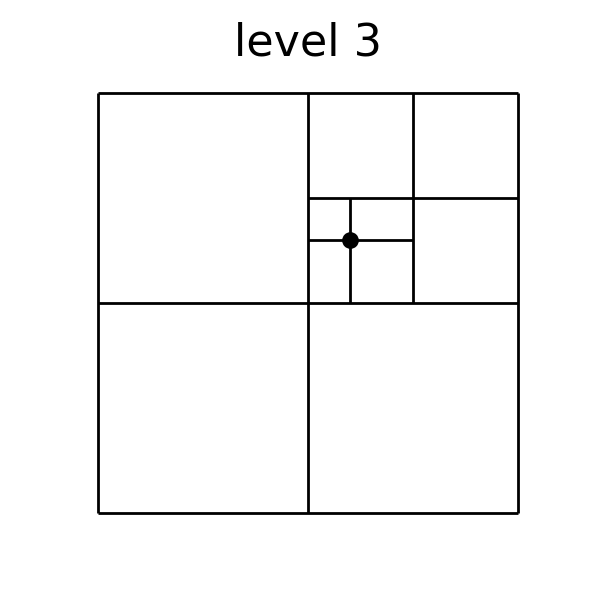

In [109]:
## Figure 2: Refinement Diagrams


def refinementDiagram(save=False):
    xloc=0.6
    yloc=0.65
    bc_thickness=1.0
    fig1, ax1 = plt.subplots(figsize=(3,3))
    ax1.set_aspect('equal')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.axis('off')
    plt.vlines(0, 0, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.vlines(1, 0, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.hlines(0, 0, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.hlines(1, 0, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.plot(xloc,yloc,'ko',markersize=5)
    plt.title("level 0",fontsize=16)
    if save != False:
        plt.savefig(figuresDir+'level_0.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    
    plt.title("level 1",fontsize=16)
    plt.hlines(0.5, 0, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.vlines(0.5, 0, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    if save != False:
        plt.savefig(figuresDir+'level_1.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.title("level 2",fontsize=16)
    plt.hlines(0.75, 0.5, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.vlines(0.75, 0.5, 1, colors='k', linestyles='solid',linewidth=bc_thickness)
    if save != False:
        plt.savefig(figuresDir+'level_2.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.title("level 3",fontsize=16)
    plt.hlines(yloc, 0.5, 0.75, colors='k', linestyles='solid',linewidth=bc_thickness)
    plt.vlines(xloc, 0.5, 0.75, colors='k', linestyles='solid',linewidth=bc_thickness)
    if save != False:
        plt.savefig(figuresDir+'level_3.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    
    
    return

refinementDiagram(save=True)

In [4]:
## Figure 3: benzene meshes from Visit?

In [305]:
## Figure 4a: p refinement for CO

# Load Data
try:
    file='runComparison.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/pRefinement/'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/p-refinement/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
    df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    # Beryllium
#     TotalEnergy = -1.4446201118081863e+01
#     ExchangeEnergy = -2.2903921833555341e+00
#     CorrelationEnergy = -2.2343205529440757e-01
#     BandEnergy = -8.1232305760491457e+00
#     KineticEnergy =  1.4309060170370618e+01
#     ElectrostaticEnergy = -8.1232305760491457e+00
#     HartreeEnergy = 7.115210167512  # pc-4
    
    # CO Molecule DFT-FE 
#     TotalEnergy = -112.47144323799400
#     TotalEnergy = -112.47167888917213  # new
#     TotalEnergy = -112.47189144159900  # newnew
    TotalEnergy = -112.471925162522 # newnewnew
    BandEnergy = -6.2898682441673358e+01 
    HartreeEnergy = 76.1983318
    ExchangeEnergy = 0.0
    CorrelationEnergy = 0.0
    KineticEnergy = 0.0

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
    df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
    df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')

    df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
    df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
    df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    

# Plotting functions
def beryllium_p_refinement(df,A,B,save=False):
    default_cycler =  ( cycler(marker=['o', '^', 's',]) * cycler(linestyle=['-']) ) + cycler('color', 'bgr')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
    fig, ax = plt.subplots(figsize=(4,3))
    df.plot(x=B, y="absTotalEnergyError", logy=True, fillstyle='none', ax=ax,legend=False)
#     df.plot(x=B, y="absBandEnergyError", logy=True, fillstyle='none', ax=ax, label="Band Energy")
#     df.plot(x=B, y="absHartreeEnergyError", logy=True, fillstyle='none', ax=ax, label="Hartree Energy")
#     plt.legend()
    plt.xlabel('Quadrature Order $p_{quad}$')
    plt.ylabel('Total Energy Error (Ha/atom)')
#     plt.grid()
    
#     ax.xaxis.set_major_locator(ticker.LogLocator(numticks=4))
    
    plt.ylim([1e-4,3e-3])
    plt.xlim([3.8,7.2])
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
#     ax.text(0.1, 0.05, 'a', transform=ax.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')

    if save != False:
        saveID = save
        print('Saving figure to: ', figuresDir+saveID+'.png')
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
# print(df.head())
print(df["order"])
print(df["absTotalEnergyError"])
df3 = df.loc[df['divideParameter3']==3*10**(-7)]
print(df3["numberOfPoints"])
# print(df3["numberOfCells"])
# print(df3.head())
# beryllium_p_refinement(df3,'absTotalEnergyError', 'correctedOrder',save='CO-p-refinement')
# beryllium_p_refinement(df3,'absTotalEnergyError', 'order',save='CO-p-refinement')
# beryllium_p_refinement(df3,'absTotalEnergyError', 'correctedOrder',save='CO-p-refinement')
# beryllium_p_refinement(df3,'absTotalEnergyError', 'numberOfPoints',save='CO-p-refinement')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.
0    4
1    5
2    6
3    7
Name: order, dtype: int64
0    0.001313
1    0.000605
2    0.000311
3    0.000179
Name: absTotalEnergyError, dtype: float64
0     661625
1    1143288
2    1815499
3    2710016
Name: numberOfPoints, dtype: int64


In [306]:
## Figure 4b: h refinement for CO

# Load Data
try:
    file='runComparison.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/hRefinement/'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/singsubt/'
    nAtoms=2
    df = pd.read_csv(resultsDir+file, header=0)
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     TotalEnergy = -1.4446201118081863e+01
#     ExchangeEnergy = -2.2903921833555341e+00
#     CorrelationEnergy = -2.2343205529440757e-01
#     BandEnergy = -8.1232305760491457e+00
#     KineticEnergy =  1.4309060170370618e+01
#     ElectrostaticEnergy = -8.1232305760491457e+00
#     HartreeEnergy = 7.115210167512  # pc-4
    
    # CO Molecule DFT-FE 
#     TotalEnergy = -112.47144323799400
#     TotalEnergy = -112.47167888917213  # new
#     TotalEnergy = -112.47189144159900  # newnew
    TotalEnergy = -112.471925162522 #newnewnew
    BandEnergy = -6.2898682441673358e+01 
    HartreeEnergy = 76.1983318
    ExchangeEnergy = 0.0
    CorrelationEnergy = 0.0
    KineticEnergy = 0.0

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
    df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
    df['absTotalEnergyErrorPerAtom']= abs( df['TotalEnergy'] - TotalEnergy)/nAtoms
    df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')

    df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
    df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
    df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    
    
# print(df['absTotalEnergyErrorPerAtom'])
    

# Plotting functions
def berylliumMeshRefinement(df,A,B,C,save=False):
#     df = df.drop(df.index[14])
    
    default_cycler =  ( cycler(marker=['o', '*', 's',]) * cycler(linestyle=['-']) ) + cycler('color', 'bgr')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)

    fig, ax = plt.subplots(figsize=(4,3))
#     df.plot(x=B, y='absTotalEnergyError', fillstyle='none', ax=ax, loglog=True, label='Total Energy')
#     df.plot(x=B, y='absBandEnergyError', ax=ax, loglog=True, label='Band Energy')
#     df.plot(x=B, y='absHartreeEnergyError', fillstyle='none', ax=ax, loglog=True, label='Hartree Energy')
#     df.plot(x=B, y='absTotalEnergyErrorPerAtom', fillstyle='none', ax=ax, loglog=True,legend=False)
#     df.plot(x='divideParameter3', y='absTotalEnergyErrorPerAtom', fillstyle='none', ax=ax, loglog=True,legend=False)
    df.plot(x='numberOfPoints', y='absTotalEnergyErrorPerAtom', fillstyle='none', ax=ax, loglog=True,legend=False)
#     df.plot(x=B, y='absTotalEnergyErrorPerAtom', fillstyle='none', ax=ax, loglog=True,legend=False)

#     plt.ylim([1e-3,1e-2])
#     plt.legend() 
#     plt.grid()
#     ax.text(0.1, 0.05, 'b', transform=ax.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')
    
    
#     plt.xlabel('Mesh Refinement Parameter $\gamma$')
    plt.xlabel('Mesh Size $N_m$')
    plt.ylabel('Total Energy Error (Ha/atom)')

    
#     plt.ylim([3e-4,3e-3])
    plt.ylim([1e-4,3e-3])
    plt.xlim([3e5,1e6])

    if save != False:
        saveID = save
        print('Saving figure to: ', figuresDir+saveID+'.png')
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
df2 = df.loc[df['GreenSingSubtracted']==1]

# print(df2["divideParameter3"])
# print(df2["numberOfPoints"])
# print(df2["numberOfCells"])
print(df2["absTotalEnergyError"])
# berylliumMeshRefinement(df2,'absTotalEnergyErrorPerAtom', 'divideParameter3', 'divideParameter3',save='CO-h-refinement')


'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.
5    0.003946
6    0.002550
7    0.001284
8    0.000674
Name: absTotalEnergyError, dtype: float64


In [79]:
## Figure 5: Singularity subtraction
# Load Data
try:
    file='runComparison.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/compareSingularitySubtractionBeryllium/'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/singsubt/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
    df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     # Beryllium
#       nAtoms=1
#     TotalEnergy = -1.4446201118081863e+01
#     ExchangeEnergy = -2.2903921833555341e+00
#     CorrelationEnergy = -2.2343205529440757e-01
#     BandEnergy = -8.1232305760491457e+00
#     KineticEnergy =  1.4309060170370618e+01
#     ElectrostaticEnergy = -8.1232305760491457e+00
#     HartreeEnergy = 7.115210167512  # pc-4
    
    # CO Molecule DFT-FE 
    nAtoms=2
#     TotalEnergy = -112.47144323799400
    TotalEnergy = -112.47167888917213  # new
    BandEnergy = -6.2898682441673358e+01 
    HartreeEnergy = 76.1983318
    ExchangeEnergy = 0.0
    CorrelationEnergy = 0.0
    KineticEnergy = 0.0
    

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
    df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
    df['absTotalEnergyErrorPerAtom'] = abs( df['TotalEnergy'] - TotalEnergy)/nAtoms
    df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')

    df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
    df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
    df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    
# Plotting functions
def singularitySubtraction(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(4,3))
    ax.xaxis.set_major_locator(plt.MaxNLocator(2))
   
    default_cycler = ( cycler(linestyle=['--']) * cycler(marker=['o', '^']) ) + cycler('color', 'rb')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
    grouped = df.groupby(C)
    for name,group in grouped:
        print(name)
        if name==0:
            lab='Without singularity subtraction'
        if name==1:
            lab='With singularity subtraction'
        group.plot(x=B, y=A, ax=ax, fillstyle='none', loglog=True,label=lab)
        
    plt.legend(loc = 'best')
    plt.xlabel('Mesh Size ($N_M$)')
    plt.ylabel('Absolute Error (Ha)')
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
#     plt.grid()
    
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
df2 = df.loc[df['numberOfPoints']>3e5] # Not converging when < 3e5 points for the singularity subtraction.

print(df2["numberOfPoints"])
print(df2["divideParameter3"])
print(df2["absTotalEnergyError"])
# singularitySubtraction(df2,'absTotalEnergyErrorPerAtom', 'numberOfPoints', 'GreenSingSubtracted',save='CO_singularity_subtraction')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.
1    370250
2    459500
3    661625
4    928500
5    370250
6    459500
7    661625
8    928500
Name: numberOfPoints, dtype: int64
1    3.000000e-06
2    1.000000e-06
3    3.000000e-07
4    1.000000e-07
5    3.000000e-06
6    1.000000e-06
7    3.000000e-07
8    1.000000e-07
Name: divideParameter3, dtype: float64
1    0.823003
2    0.701554
3    0.557822
4    0.429552
5    0.004193
6    0.002796
7    0.001530
8    0.000920
Name: absTotalEnergyError, dtype: float64


((cycler('marker', ['o', '^', 's']) * cycler('linestyle', ['--'])) + cycler('color', ['r', 'b', 'g']))


<IPython.core.display.Javascript object>


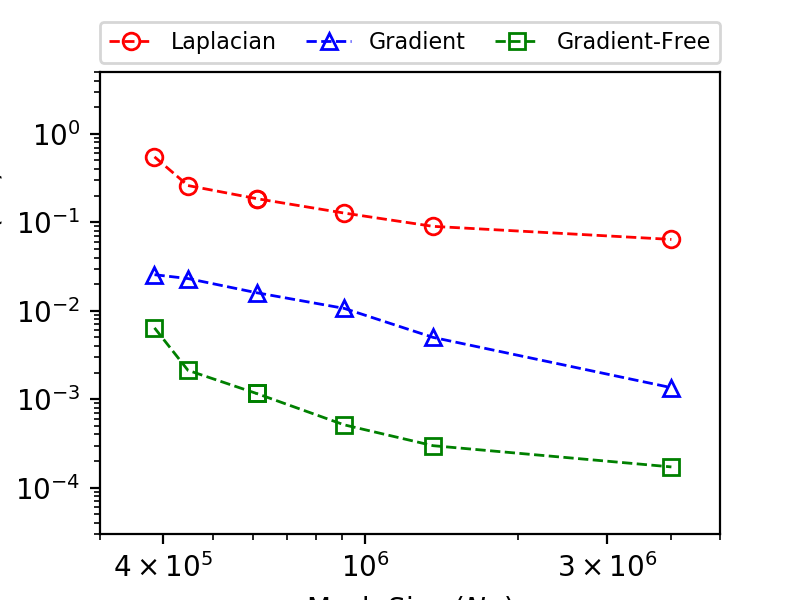

In [792]:
## Figure 6: Gradient-free eigenvalue update
# Load Data
try:
    file='runComparison.csv'  # this contains complete data for order 6
#     file='runComparison_original.csv' # this contains complete data for order 4
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/OxygenData/gradientFree/'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/gradientFree/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/gradientF ree_preOrth/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_order5/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_lw5/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_domain40/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_preOrth/'
    df = pd.read_csv(resultsDir+file, header=0)
    df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     # Oxygen Atom DFT-FE 
#     TotalEnergy = -7.4469337501098821e+01
#     BandEnergy = -4.0613397710076626e+01 
#     HartreeEnergy = 36.32506036
#     ExchangeEnergy = 0.0
#     CorrelationEnergy = 0.0
#     KineticEnergy = 0.0
#     nAtoms=1

    
    # CO Molecule DFT-FE 
#     TotalEnergy = -112.47144323799400
#     TotalEnergy = -112.47167888917213  # new
    TotalEnergy = -112.471925162522 #newnewnew
    BandEnergy = -6.2898682441673358e+01 
    HartreeEnergy = 76.1983318
    ExchangeEnergy = 0.0
    CorrelationEnergy = 0.0
    KineticEnergy = 0.0
#     TotalEnergy=-112.47167888917213  # Tighter DFT-FE run
    nAtoms=2


# ## Beryllium Atom DFT-FE 
# #     TotalEnergy = -1.4446201118081863e+01
#     TotalEnergy = -14.44619576
# #     TotalEnergy=-14.44619576
#     BandEnergy = -8.1232305760491457e+00
# #     HartreeEnergy = 36.32506036
# #     ExchangeEnergy = 0.0
# #     CorrelationEnergy = 0.0
# #     KineticEnergy = 0.0
#     nAtoms=1
    



    

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
#     df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
#     try: 
#         df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
#     except Exception as e:
#         print(e, ' not present.')
#     df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
#     df['absTotalEnergyErrorPerAtom'] = abs( df['TotalEnergy'] - TotalEnergy-0.006)/nAtoms #/2 for CO molecule
    df['absTotalEnergyErrorPerAtom'] = abs( df['TotalEnergy'] - TotalEnergy)/nAtoms #/2 for CO molecule
    
#     df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
#     try: 
#         df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
#     except Exception as e:
#         print(e, ' not present.')

#     df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
#     df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
#     try: 
#         df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
#     except Exception as e:
#         print(e, ' not present.')
#     df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
#     df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
#     try: 
#         df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
#     except Exception as e:
#         print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    
    
    
# Plotting functions
def gradientFree(df,A,B,C,LL=True,save=False):
    df = df
#     print(df['absTotalEnergyErrorPerAtom'])
#     print(df)
    df=df.sort_values(by=['gradientFree'])
#     print(df['absTotalEnergyErrorPerAtom'])
    
#     print(df['divideParameter3'])
    
#     default_cycler = cycler(color=['k']) * (cycler(marker=['o', '^','s'])) 
    default_cycler = cycler(marker=['o', '^','s']) * cycler(linestyle=['--']) + cycler('color', 'rbg')
#     default_cycler = cycler(marker=['o', 'o','o','o']) * cycler(linestyle=['--']) + cycler('color', 'rgbc')
    # cycler('color', 'bgrcmyk')
    print(default_cycler)

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)

    fig, ax = plt.subplots(figsize=(4,3))
    df = df.sort_values(by=B)
    orderGrouped = df.groupby('order')
    for method in ['Laplacian','Gradient','Gradient-Free']:
        for nameO,groupO in orderGrouped:
            grouped = groupO.groupby(C)
    #     print(grouped)
    #     grouped.sort_values(C, ascending=False)
#         for method in ['Laplacian','Gradient','Gradient-Free']:
#         for method in ['Laplacian','False','True']:
#         for method in ['False','True','Gradient','Gradient-Free']:
#         for method in ['False']:
            for name,group in grouped:
    #             print('init name = ', name, '. type: ', type(name))
                if ((name==True) or (name=='True') ):
                    name='Gradient-Free'
                if ((name==False) or (name=='False') ):
                    name='Gradient'
    #             print('final name = ', name, ', type: ', type(name))
                if name==method:
#                     group.plot(x=B, y=A, fillstyle='none', ax=ax, loglog=LL, label='%s; order %i'%(name,nameO))
                    group.plot(x=B, y=A, fillstyle='none', ax=ax, loglog=LL, label='%s'%(name))
                else:
                    pass
#                     print("not plotting... name = %s but method = %s" %(name,method))
#     plt.legend(loc='best') 
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=3, mode="expand", borderaxespad=0.,fontsize=8)
    
#     ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.xlabel('Mesh Size ($N_M$)')
#     plt.xlabel(r'$\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Absolute Error (Ha)') 
#     plt.grid()
    
#     if LL==True:
    plt.ylim([3e-5,5])

    plt.xlim([3e5, 5e6])
    plt.xticks([4e5, 1e6, 3e6], [r'$4\times 10^5$', r'$10^6$', r'$3\times 10^6$'])
    
 
#     plt.xlim([3.2e5, 1.6e6])
#     plt.xticks([4e5, 1e6, 3e6], [r'$4\times 10^5$', r'$6\times 10^5$', r'$1\times 10^6$'])
    
    
#     plt.xlim([3.2e5, 1.6e6])
#     ax.tick_params(labelbottom=False) #     l=[4e5, 6e5, 1e6]
#     x=['4e5', '6e5', '1e6']
    
#     l=[4e5, 6e5, 1e6]
#     x=['4e5', '6e5', '1e6']
#     ax.set_xticks(l)
#     ax.set_xticklabels(x)
    

    #     plt.xticks(, )

#     ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# #     plt.grid()
    
#     df.plot(x='divideParameter3',y='batchSize',logx=True,style='o')
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
    
# gradientFree(df,'absBandEnergyError','numberOfPoints','gradientFree',save='oxygen_gradient_free')
# gradientFree(df,'absHartreeEnergyError','numberOfPoints','gradientFree',save='oxygen_gradient_free')
# gradientFree(df,'absTotalEnergyError','numberOfPoints','gradientFree',save='CO_gradient_free')


df6 = df.loc[df['order']==6]
gradientFree(df6,'absTotalEnergyErrorPerAtom','numberOfPoints','gradientFree',save='CO_gradient_free_o6')

# df4 = df.loc[df['order']==4]
# df4 = df4.loc[df4['numberOfPoints']>2e5]
# df4 = df4.loc[df4['numberOfPoints']<2e6]
# gradientFree(df4,'absTotalEnergyErrorPerAtom','numberOfPoints','gradientFree',save='CO_gradient_free_o4')




# # gradientFree(df,'absTotalEnergyErrorPerAtom','numberOfPoints','gradientFree',save='O_gradient_free')
# df = df.loc[df['absTotalEnergyErrorPerAtom']<10]
# # df = df.loc[df['order']==4]
# gradientFree(df,'absBandEnergyError','numberOfPoints','gradientFree',save='Be_gradient_free')
# gradientFree(df,'absTotalEnergyErrorPerAtom','numberOfPoints','gradientFree',save='Be_gradient')
# # print(df['TotalEnergyError'])
# # print(df['absTotalEnergyErrorPerAtom'])
# gradientFree(df,'TotalEnergyError','numberOfPoints','gradientFree',LL=False,save='Be_gradient')

# # print(df['divideParameter3'])
# # print(df['order'])

<IPython.core.display.Javascript object>


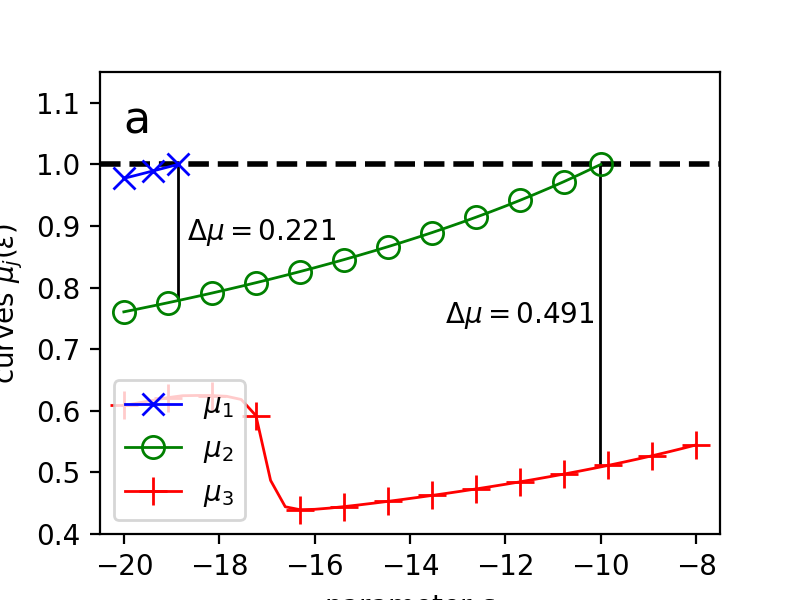

In [837]:
## Figure 7a: mu vs. epsilon deep
# Load Data
try:
    resultsDir = '/Users/nathanvaughn/Documents/synchronizedDataFiles/eigOneTests/'
#     file = 'CO_high_SCF_661625.csv'
#     nWavefunctions=7
    file = 'CO_low_SCF_661625.csv'
    nWavefunctions=3
    df = pd.read_csv(resultsDir+file, header=0)
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     print(df.shape[0])
    ## Filling residual and error 
    epsilonArray = np.zeros((df.shape[0],1))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    tempEpsilons = np.zeros((df.shape[0],nWavefunctions))
    for i in range(df.shape[0]):
        eigenvaluesMatrix[i,:] =  np.array( df.orbitalEnergies[i][1:-1].split(),dtype=float) 

#     print(eigenvaluesMatrix)
    for i in range(nWavefunctions):
#     for i in range(4):
#         print(i)
        hitOne=False
        firstNoneJ=1e6
        for j in range(df.shape[0]):

            if hitOne==False:
                if abs(eigenvaluesMatrix[j,i]-1)<1e-5:
                    hitOne=True
#                     print(df['targetEpsilon'][j])
#                     tempEigenvalues[j,i] = None
#                     df['targetEpsilon'][j-1]-=0.1
                if abs(eigenvaluesMatrix[j,i]-eigenvaluesMatrix[j-1,i])<1e-5:
                    hitOne=True
#                     print(df['targetEpsilon'][j])
#                     tempEigenvalues[j,i] = None
#                     df['targetEpsilon'][j-1]-=0.1
            if hitOne==False: 
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
                tempEpsilons[j,i] = df['targetEpsilon'][j]

            else:
                if j<firstNoneJ:
                    firstNoneJ=j
                tempEigenvalues[j,i] = None
#                 tempEigenvalues[j-1,i] = None
#                 print('setting to none')
        if firstNoneJ!=1e6:
            epsilon_shift=0
            slope = (tempEigenvalues[firstNoneJ-2,i]-tempEigenvalues[firstNoneJ-3,i]) / (tempEpsilons[firstNoneJ-2,i]-tempEpsilons[firstNoneJ-3,i])
            distTo1 = 1-tempEigenvalues[firstNoneJ-2,i]
            shift=distTo1/slope
#             print("Slope = ", slope)
#             print("Distance to 1 = ", distTo1)
#             print('Shifting final epsilon ', (i+1), ' by ', shift)
            tempEpsilons[firstNoneJ-1,i] = tempEpsilons[firstNoneJ-2,i] + shift
#             tempEigenvalues[firstNoneJ-1,i]=1
        else:
            pass
#             print("No intercept, so no shift.")
            
        
#         print("setting eigenvalues ", i)
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
#         print("Setting epsilon ", i)
        df['epsilon'+str(i)] = tempEpsilons[:,i]
#         print(df['eigenvalue'+str(i)])
#         print(df['epsilon'+str(i)])

#         df['eigenvalue'+str(i)] = eigenvaluesMatrix[:,i]    
except Exception as e:
    print(e, '\nErrors not computed properly.')
    
def plot_mu_vs_epsilon(df,gap=None,save=False):
    f0, (ax0) = plt.subplots(1,1, figsize=(4,3))

#     default_cycler = cycler(linewidth=[1])* \
#                     cycler(marker=['o']) *cycler(markersize=[5])*cycler(linestyle=['-']) * cycler('color', 'bgr')

    default_cycler =(cycler(linewidth=[1,1,1])+
                    cycler(linestyle=['-','-','-']) + 
                    cycler('color', 'bgr') +
                    cycler(marker=['x','o','+'])+
                    cycler(markersize=[8,8,10])+
                    cycler(markevery=[2,3,3])  )
    
    plt.rc('axes', prop_cycle=default_cycler)
    plt.axhline(y=1.0, color='k', linestyle='--',linewidth=2)
    for i in range(nWavefunctions):
#     for i in range(2,5):
#         df.plot(y='eigenvalue'+str(i),x='targetEpsilon',ax=ax0, fillstyle='none',label=r'$\mu_{%i}$' %(i+1),legend=True)
        if i==2:
            # slice df
            df.plot(y='eigenvalue'+str(i),x='epsilon'+str(i),ax=ax0, fillstyle='none',label=r'$\mu_{%i}$' %(i+1),legend=True)
        else:
            df.plot(y='eigenvalue'+str(i),x='epsilon'+str(i),ax=ax0, fillstyle='none',label=r'$\mu_{%i}$' %(i+1),legend=True)

            #     ax0.set_ylabel(r'Integral operator eigenvalues $\mu$')
    ax0.set_ylabel(r'curves $\mu_j(\varepsilon)$')
#     ax0.set_xlabel(r'Hamiltonian eigenvalue $\varepsilon$')
    ax0.set_xlabel(r'parameter $\varepsilon$')
    
    if gaps!=None:
        for gap in gaps:
    #         height=(1+ymin=gap['mu_min'])/2
            plt.vlines(x=gap['epsilon'], ymin=gap['mu_min'], ymax=1.0)
            plt.text(gap['epsilon']+gap['hshift'], (1+gap['mu_min'])/2, r"$\Delta{\mu}{=}$%.3f" %(1-gap['mu_min']) , 
                     verticalalignment='center',horizontalalignment=gap['align'])

    plt.legend(loc='lower left')
    plt.xlim([-20.5,-7.5])
    plt.ylim([0.4,1.15])
    
    plt.text(-20,1.05,'a',fontsize=16)
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()
    
    
    

gap0={}
gap0['epsilon']=-18.870
gap0['mu_min'] = 0.779
gap0['align']='left'
gap0['hshift']=0.2

gap1={}
gap1['epsilon']=-10.008
gap1['mu_min'] = 0.509
gap1['align']='right'
gap1['hshift']=-0.13



gaps=[gap0,gap1]
plot_mu_vs_epsilon(df, gaps,save='deep-states')

<IPython.core.display.Javascript object>


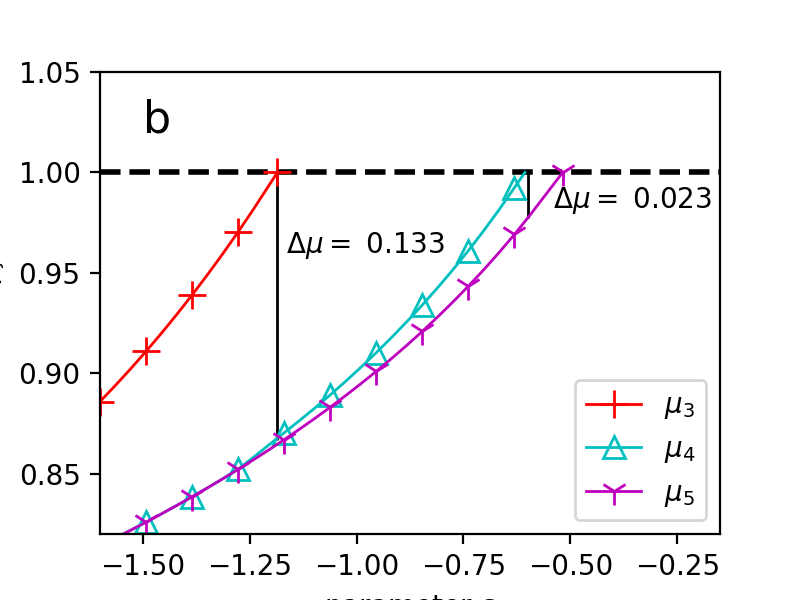

In [832]:
## Figure 7b: mu vs. epsilon shallow
# Load Data
# $\Delta \mu = 0.22$

# $\Delta{\mu}{=}0.22$

# $\Delta{\mu}\,{=}\,0.22$
try:
    resultsDir = '/Users/nathanvaughn/Documents/synchronizedDataFiles/eigOneTests/'
    file = 'CO_high_SCF_661625.csv'
    nWavefunctions=7
#     file = 'CO_low_SCF_661625.csv'
#     nWavefunctions=3
    df = pd.read_csv(resultsDir+file, header=0)
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     print(df.shape[0])
    ## Filling residual and error 
    epsilonArray = np.zeros((df.shape[0],1))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    tempEpsilons = np.zeros((df.shape[0],nWavefunctions))
    for i in range(df.shape[0]):
        eigenvaluesMatrix[i,:] =  np.array( df.orbitalEnergies[i][1:-1].split(),dtype=float) 

#     print(eigenvaluesMatrix)
    for i in range(nWavefunctions):
#     for i in range(4):
#         print(i)
        hitOne=False
        firstNoneJ=1e6
        for j in range(df.shape[0]):

            if hitOne==False:
                if abs(eigenvaluesMatrix[j,i]-1)<1e-4:
                    hitOne=True
#                     print(df['targetEpsilon'][j])
#                     tempEigenvalues[j,i] = None
#                     df['targetEpsilon'][j-1]-=0.1
                if abs(eigenvaluesMatrix[j,i]-eigenvaluesMatrix[j-1,i])<1e-3:
                    hitOne=True
#                     print(df['targetEpsilon'][j])
#                     tempEigenvalues[j,i] = None
#                     df['targetEpsilon'][j-1]-=0.1
            if hitOne==False: 
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
                tempEpsilons[j,i] = df['targetEpsilon'][j]

            else:
                if j<firstNoneJ:
                    firstNoneJ=j
                tempEigenvalues[j,i] = None
#                 tempEigenvalues[j-1,i] = None
#                 print('setting to none')
        
        if firstNoneJ!=1e6:
            epsilon_shift=0
            slope = (tempEigenvalues[firstNoneJ-2,i]-tempEigenvalues[firstNoneJ-3,i]) / (tempEpsilons[firstNoneJ-2,i]-tempEpsilons[firstNoneJ-3,i])
            distTo1 = 1-tempEigenvalues[firstNoneJ-2,i]
            shift=distTo1/slope
#             print("Slope = ", slope)
#             print("Distance to 1 = ", distTo1)
#             print('Shifting final epsilon ', (i+1), ' by ', shift)
            tempEpsilons[firstNoneJ-1,i] = tempEpsilons[firstNoneJ-2,i] + shift
            tempEigenvalues[firstNoneJ-1,i]=1
        else:
            pass
#             print("No intercept, so no shift.")
            
        
#         print("setting eigenvalues ", i)
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
#         print("Setting epsilon ", i)
        df['epsilon'+str(i)] = tempEpsilons[:,i]
#         print(df['eigenvalue'+str(i)])
#         print(df['epsilon'+str(i)])

#         df['eigenvalue'+str(i)] = eigenvaluesMatrix[:,i]    
except Exception as e:
    print(e, '\nErrors not computed properly.')
    
def plot_mu_vs_epsilon(df,gap=None,save=False):
    f0, (ax0) = plt.subplots(1,1, figsize=(4,3))

#     default_cycler = cycler(linewidth=[1])* \
#                     cycler(marker=['o']) *cycler(markersize=[5])*cycler(linestyle=['-']) * cycler('color', 'rcm')
# #                     cycler(marker=['o']) *cycler(markersize=[5])*cycler(linestyle=['-']) * cycler('color', 'bgrcmyk')
    
    default_cycler =(cycler(linewidth=[1,1,1,1,1])+
                    cycler(linestyle=['-','-','-','-','-']) + 
                    cycler('color', 'rcmyk') +
                    cycler(marker=['+','^','1','v','s'])+
                    cycler(markersize=[10,8,10,8,8])+
                    cycler(markevery=[3,3,3,5,5])  )
#                     cycler(markevery=[1,1,1,1,1])  )
    
    plt.rc('axes', prop_cycle=default_cycler)
    plt.axhline(y=1.0, color='k', linestyle='--',linewidth=2)
#     for i in range(nWavefunctions):
    for i in range(2,5):
#         df.plot(y='eigenvalue'+str(i),x='targetEpsilon',fillstyle='none',ax=ax0,label=r'$\mu_{%i}$' %(i+1),legend=True)
        df.plot(y='eigenvalue'+str(i),x='epsilon'+str(i),ax=ax0, fillstyle='none',label=r'$\mu_{%i}$' %(i+1),legend=True)

    #     ax0.set_ylabel(r'Integral operator eigenvalues $\mu$')
    ax0.set_ylabel(r'curves $\mu_j(\varepsilon)$')
#     ax0.set_xlabel(r'Hamiltonian eigenvalue $\varepsilon$')
    ax0.set_xlabel(r'parameter $\varepsilon$')
    
    if gaps!=None:
        for gap in gaps:
    #         height=(1+ymin=gap['mu_min'])/2
            plt.vlines(x=gap['epsilon'], ymin=gap['mu_min'], ymax=1.0)
            plt.text(gap['epsilon']+gap['hshift'], (1+gap['mu_min'])/2+gap['vshift'], r"$\Delta{\mu}{=}$ %.3f" %(1-gap['mu_min']) , 
                     verticalalignment='center',horizontalalignment=gap['align'])
    plt.legend()
    plt.ylim([0.82, 1.05])
    plt.xlim([-1.6, -0.15])
    plt.text(-1.5,1.02,'b',fontsize=16)

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()
    
    
    



gap2={}
gap2['epsilon']=-1.185
gap2['mu_min'] = 0.867
gap2['align']='left'
gap2['hshift']=0.02
gap2['vshift']=0.03

gap3={}
gap3['epsilon']=-0.60
gap3['mu_min'] = 0.9773
gap3['align']='left'
gap3['hshift']=0.06
gap3['vshift']=-0.0025
# gaps=[gap0,gap1]
gaps=[gap2,gap3]
# plot_mu_vs_epsilon(df, gaps,save='deep-states')
plot_mu_vs_epsilon(df, gaps,save='shallow-states')

<IPython.core.display.Javascript object>


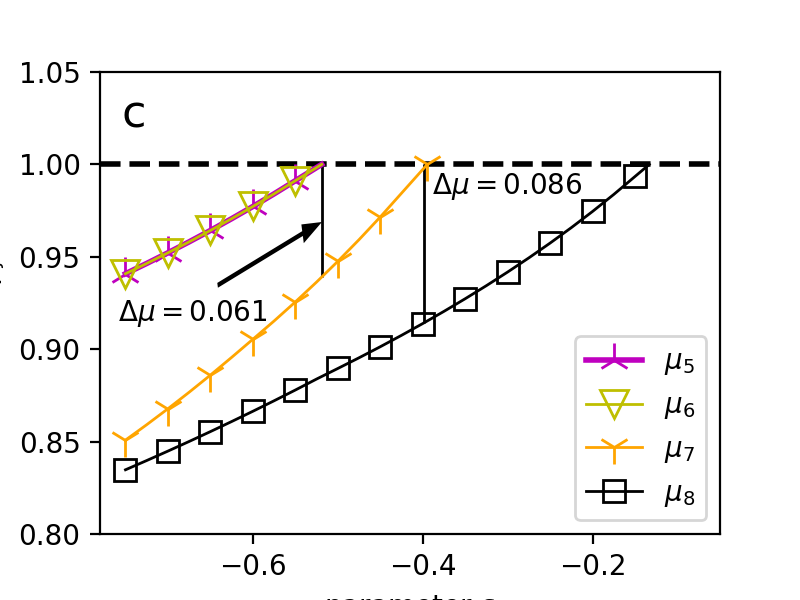

In [719]:
## Figure 7c: mu vs. epsilon shallowest
# Load Data
# $\Delta \mu = 0.22$

# $\Delta{\mu}{=}0.22$

# $\Delta{\mu}\,{=}\,0.22$
try:
    resultsDir = '/Users/nathanvaughn/Documents/GLsync/eigOne/'
    file = 'temp.csv'
    nWavefunctions=8
#     file = 'CO_low_SCF_661625.csv'
#     nWavefunctions=3
    df = pd.read_csv(resultsDir+file, header=0)
    df = df.sort_values(by=['targetEpsilon'])
    df = df.reset_index()


except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     print(df.shape[0])
    ## Filling residual and error 
    epsilonArray = np.zeros((df.shape[0],1))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    tempEpsilons = np.zeros((df.shape[0],nWavefunctions))
    for i in range(df.shape[0]):
        eigenvaluesMatrix[i,:] =  np.array( df.orbitalEnergies[i][1:-1].split(),dtype=float) 

#     print(eigenvaluesMatrix)
    for i in range(nWavefunctions):
#     for i in range(4):
#         print(i)
        hitOne=False
        firstNoneJ=1e6
        for j in range(df.shape[0]):
#             print(j)

            if hitOne==False:
                if abs(eigenvaluesMatrix[j,i]-1)<1e-4:
                    hitOne=True
#                     print(df['targetEpsilon'][j])
#                     tempEigenvalues[j,i] = None
#                     df['targetEpsilon'][j-1]-=0.1
                if abs(eigenvaluesMatrix[j,i]-eigenvaluesMatrix[j-1,i])<2e-3:
                    hitOne=True
#                     print(df['targetEpsilon'][j])
#                     tempEigenvalues[j,i] = None
#                     df['targetEpsilon'][j-1]-=0.1
            if hitOne==False: 
                
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
                tempEpsilons[j,i] = df['targetEpsilon'][j]
#                 print(tempEpsilons[j,i])
                
            else:
                if j<firstNoneJ:
                    firstNoneJ=j
                tempEigenvalues[j,i] = None
#                 tempEigenvalues[j-1,i] = None
#                 print('setting to none')
        
        if firstNoneJ!=1e6:
            epsilon_shift=0
            slope = (tempEigenvalues[firstNoneJ-2,i]-tempEigenvalues[firstNoneJ-3,i]) / (tempEpsilons[firstNoneJ-2,i]-tempEpsilons[firstNoneJ-3,i])
            distTo1 = 1-tempEigenvalues[firstNoneJ-2,i]
            shift=distTo1/slope
#             print("Slope = ", slope)
#             print("Distance to 1 = ", distTo1)
#             print('Shifting final epsilon ', (i+1), ' by ', shift)
            tempEpsilons[firstNoneJ-1,i] = tempEpsilons[firstNoneJ-2,i] + shift
            tempEigenvalues[firstNoneJ-1,i]=1
        else:
            pass
#             print("No intercept, so no shift.")
            
        
#         print("setting eigenvalues ", i)
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
#         print("Setting epsilon ", i)
        df['epsilon'+str(i)] = tempEpsilons[:,i]
#         print(df['eigenvalue'+str(i)])
#         print(df['epsilon'+str(i)])

#         df['eigenvalue'+str(i)] = eigenvaluesMatrix[:,i]    
except Exception as e:
    print(e, '\nErrors not computed properly.')
    
def plot_mu_vs_epsilon(df,gap=None,save=False):
    f0, (ax0) = plt.subplots(1,1, figsize=(4,3))

#     default_cycler = cycler(linewidth=[1])* \
#                     cycler(marker=['o']) *cycler(markersize=[5])*cycler(linestyle=['-']) * cycler('color', 'rcm')
# #                     cycler(marker=['o']) *cycler(markersize=[5])*cycler(linestyle=['-']) * cycler('color', 'bgrcmyk')
    
    default_cycler =(cycler(linewidth=[2,1,1,1])+
                    cycler(linestyle=['-','-','-','-']) + 
                    cycler('color', ('m','y','orange','k')) +
                    cycler(marker=['2','v','1','s'])+
                    cycler(markersize=[12,10,12,8])+
                    cycler(markevery=[2,2,2,2]) ) # +
#                     cycler(offset=[0,1,0,0]))
#                     cycler(markevery=[3,3,3,5,5])  )
    
    plt.rc('axes', prop_cycle=default_cycler)
    plt.axhline(y=1.0, color='k', linestyle='--',linewidth=2)
#     for i in range(nWavefunctions):
    for i in range(4,8):
        df_temp = df.sort_values(by=['epsilon'+str(i)])
#         print(i)
#         df.plot(y='eigenvalue'+str(i),x='targetEpsilon',fillstyle='none',ax=ax0,label=r'$\mu_{%i}$' %(i+1),legend=True)
        df_temp.plot(y='eigenvalue'+str(i),x='epsilon'+str(i),ax=ax0, fillstyle='none',label=r'$\mu_{%i}$' %(i+1),legend=True)

    #     ax0.set_ylabel(r'Integral operator eigenvalues $\mu$')
    ax0.set_ylabel(r'curves $\mu_j(\varepsilon)$')
#     ax0.set_xlabel(r'Hamiltonian eigenvalue $\varepsilon$')
    ax0.set_xlabel(r'parameter $\varepsilon$')
    
    if gaps!=None:
        for gap in gaps:
    #         height=(1+ymin=gap['mu_min'])/2
            plt.vlines(x=gap['epsilon'], ymin=gap['mu_min'], ymax=1.0)
#             plt.text(gap['epsilon']+gap['hshift'], (1+gap['mu_min'])/2+gap['vshift'], r"$\Delta$ $\mu$= %.3f" %(1-gap['mu_min']) , 
#             plt.text(gap['epsilon']+gap['hshift'], (1+gap['mu_min'])/2+gap['vshift'], r"$\Delta{\mu}\,{=}\,$%.3f" %(1-gap['mu_min']) , 
            plt.text(gap['epsilon']+gap['hshift'], (1+gap['mu_min'])/2+gap['vshift'], r"$\Delta{\mu}{=}$%.3f" %(1-gap['mu_min']) , 
                     verticalalignment='center',horizontalalignment=gap['align'])
    
    
    plt.legend()
    xlow=-0.78
    plt.ylim([0.8, 1.05])
    plt.xlim([xlow, -0.05])
    plt.text(xlow+0.025,1.02,'c',fontsize=16)
    
    xi=-0.64
    yi=0.935
    xf=-0.54
    yf=0.963
    plt.arrow(xi,yi,xf-xi,yf-yi,color="k",
             head_width=0.008, head_length=0.018,overhang=0)

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()
    
    
    



gap56={}
gap56['epsilon']=-0.519
gap56['mu_min'] = 0.939
gap56['align']='left'
gap56['hshift']=-0.24
gap56['vshift']=-0.05

# gap56={}
# gap56['epsilon']=-0.519
# gap56['mu_min'] = 0.939
# gap56['align']='left'
# gap56['hshift']=0.05
# gap56['vshift']=0.06

gap7={}
gap7['epsilon']=-0.399
gap7['mu_min'] = 0.914
gap7['align']='left'
gap7['hshift']=0.01
gap7['vshift']=0.031

# gaps=[gap0,gap1]
# gaps=[gap2,gap3]
gaps=[gap56,gap7]
# plot_mu_vs_epsilon(df, gaps,save='deep-states')
plot_mu_vs_epsilon(df, gaps,save='shallowest-states')

<IPython.core.display.Javascript object>


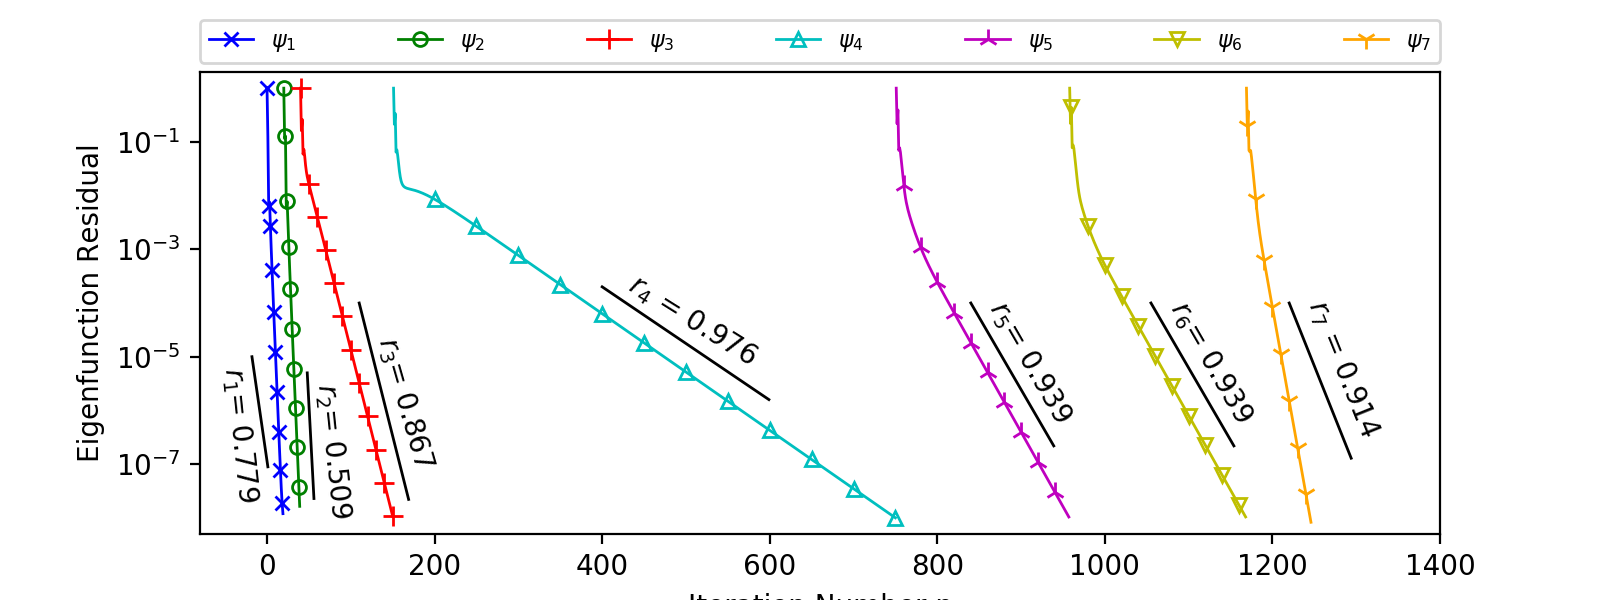

In [845]:
## Figure 8: Without Anderson Acceleration of Fixed Point
# Load Data
try:
    resultsDir = '/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/GIconvergence/'
    file = 'noAnderson_GREEN_661625.csv'
#     file='CO_rootfindingTests_PowerIteratiton_LW5_500_GREEN_375500.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    nWavefunctions=7
    referenceEnergies = np.array( [   -1.871953147002199813e+01, -9.907188115343084078e+00,
                                  -1.075324514852165958e+00, -5.215419985881135645e-01,
                                  -4.455527567163568570e-01, -4.455527560478895199e-01,
                                  -3.351419327004790394e-01
                            ] )

    ## Filling residual and error 
    residualsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    # print(np.shape(residualsMatrix))
    # print(np.shape(df.orbitalResiduals[0][1:-1].split()))
    errorsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempErrors = np.zeros((df.shape[0],nWavefunctions)) 
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    errorsMatrix1st = np.zeros((df.shape[0],nWavefunctions))
    # print('Starting at 1 instead of 0, this is for a Benzene dataframe that had different format in row 1.')
    # for i in range(1,df.shape[0]):
    for i in range(df.shape[0]):
    #     print('i = ', i)
        residualsMatrix[i,:] = np.array(df.orbitalResiduals[i][1:-1].split(),dtype=float)
        errorsMatrix[i,:] = abs( np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) - referenceEnergies )
        eigenvaluesMatrix[i,:] =  np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) 
    ##    errorsMatrix[i,:] = np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float)
        try:
            errorsMatrix1st[i,:] = np.array( df.energyErrorsWRTfirstSCF[i][1:-1].split(),dtype=float) 
        except AttributeError:
            pass

    for i in range(nWavefunctions):
        for j in range(df.shape[0]-1):
            if (residualsMatrix[j,i] - residualsMatrix[j+1,i]) != 0:
                tempResiduals[j,i] = min(1,residualsMatrix[j,i])
                tempErrors[j,i] = np.abs(errorsMatrix[j,i])
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
            else:
                tempResiduals[j,i] = None
                tempErrors[j,i] = None
                tempEigenvalues[j,i] = None
            if i ==nWavefunctions-1:
                tempResiduals[-1,i] = min(1,residualsMatrix[-1,i])
                tempErrors[-1,i] = errorsMatrix[-1,i]
                tempEigenvalues[-1,i] = eigenvaluesMatrix[-1,i]

            if i ==0:
                tempResiduals[0,i] = 1
                tempErrors[0,i] = errorsMatrix[0,i]
                tempEigenvalues[0,i] = eigenvaluesMatrix[0,i]


        df['residual'+str(i)] = tempResiduals[:,i]
        df['errors'+str(i)] = np.abs(tempErrors[:,i])
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
    
    
except Exception as e:
    print(e, 'Errors not computed properly.')
    
# Plotting functions
def plotFirstSCF(df,save=False):
    
    f0, (ax0) = plt.subplots(1,1, figsize=(8,3))

    default_cycler =(cycler(linewidth=[1,1,1,1,1,1,1])+
                    cycler(linestyle=['-','-','-','-','-','-','-']) + 
                    cycler('color', ('b','g','r','c','m','y','orange') )+
                    cycler(marker=['x','o','+','^','2','v','1'])+
                    cycler(markersize=[5,5,7,5,7,5,7])+
                    cycler(markevery=[2,2,10,50,20,20,10])  )

    
#                         cycler('color', 'bgrcmy orange') +

#     plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
#     if save=='CO_firstSCF_Anderson':
#         letter='b'
#     elif save=='CO_firstSCF_Power':
#         letter='a'
#     ax0.text(0.98, 0.05, letter, transform=ax0.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')
    
    
    for i in range(nWavefunctions):
        df.plot(y='residual'+str(i),ax=ax0,logy=True,fillstyle='none',label=r'$\psi_{%i}$' %(i+1),legend=True)

    
    # Line near psi1
    start = -18
    finish = start+20
    init = 1e-5
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init

    for i in range(1,finish-start):
        line[i] = line[i-1]*0.78
        idx[i] = idx[i-1]+1
    
    plt.text(start-40, line[0]/4, r"$r_1$= 0.779" , 
             rotation=-84)
    plt.semilogy(idx,line,'k-',linewidth=1)

    # Line near psi2
    start = 48
    finish = start+9 #120
    init = 5e-6
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init

    for i in range(1,finish-start):
        line[i] = line[i-1]*0.51
        idx[i] = idx[i-1]+1
    
    plt.text(start+5, line[0]/4, r"$r_2$= 0.509" , 
             rotation=-84)
    plt.semilogy(idx,line,'k-',linewidth=1)
    
    # Line near psi3
    start = 110
    finish = start+60 #120
    init = 1e-4
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init
    for i in range(1,finish-start):
        line[i] = line[i-1]*0.867
        idx[i] = idx[i-1]+1
        
    plt.text(start+15, line[0]/10, r"$r_3$= 0.867" , 
             rotation=-74)
    plt.semilogy(idx,line,'k-',linewidth=1)
    
    
    # Line near psi4
    start = 400
    finish = 600
    init = 2e-4
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init
    for i in range(1,finish-start):
#         line[i] = line[i-1]*0.976
        line[i] = line[i-1]*0.976
        idx[i] = idx[i-1]+1
    
    mid = int(np.floor((finish-start)/2))
    plt.semilogy(idx,line,'k-', linewidth=1) 
    plt.text(start+25, line[0]/1.3, r"$r_4$ = 0.976" , 
             rotation=-32)
    
    
    
    
    # Line near psi5 and psi6 
    start5 = 840
    start6 = 1055
    finish5 = start5+100 #120
    finish6 = start6+100 #120
    init = 1e-4
    
    line5 = np.zeros(finish5-start5)
    idx5 = np.empty(finish5-start5)
    idx5[0]=start5
    line5[0]=init
    line6 = np.zeros(finish6-start6)
    idx6 = np.empty(finish6-start6)
    idx6[0]=start6
    line6[0]=init
    for i in range(1,finish5-start5):
        line5[i] = line5[i-1]*0.94
        line6[i] = line6[i-1]*0.94
        idx5[i] = idx5[i-1]+1
        idx6[i] = idx6[i-1]+1
        
    plt.text(start5+15, line5[0]/2, r"$r_5$= 0.939" , 
             rotation=-60)
    plt.text(start6+15, line6[0]/2, r"$r_6$= 0.939" , 
             rotation=-60)
    plt.semilogy(idx5,line5,'k-',linewidth=1)
    plt.semilogy(idx6,line6,'k-',linewidth=1)
    
    
    
    # Line near psi7
    start = 1220
    finish = start+75
    init = 1e-4
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init
    for i in range(1,finish-start):
        line[i] = line[i-1]*0.914
        idx[i] = idx[i-1]+1
    
    mid = int(np.floor((finish-start)/2))
    plt.semilogy(idx,line,'k-', linewidth=1) 
    plt.text(start+15, line[0]/2, r"$r_7$ = 0.914" , 
             rotation=-68)
    
    

#     plt.legend()  
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=7, mode="expand", borderaxespad=0.,fontsize=8)
#     ax0.set_xlabel("Green's Iteration Number")
    ax0.set_xlabel("Iteration Number n")
    ax0.set_ylabel('Eigenfunction Residual')
    ax0.set_xlim([-80,1400])
#     ax0.set_xlim([140,800])
    ax0.set_ylim([5*10**(-9),2])
    

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
plotFirstSCF(df,save='CO_firstSCF_Power')


<IPython.core.display.Javascript object>


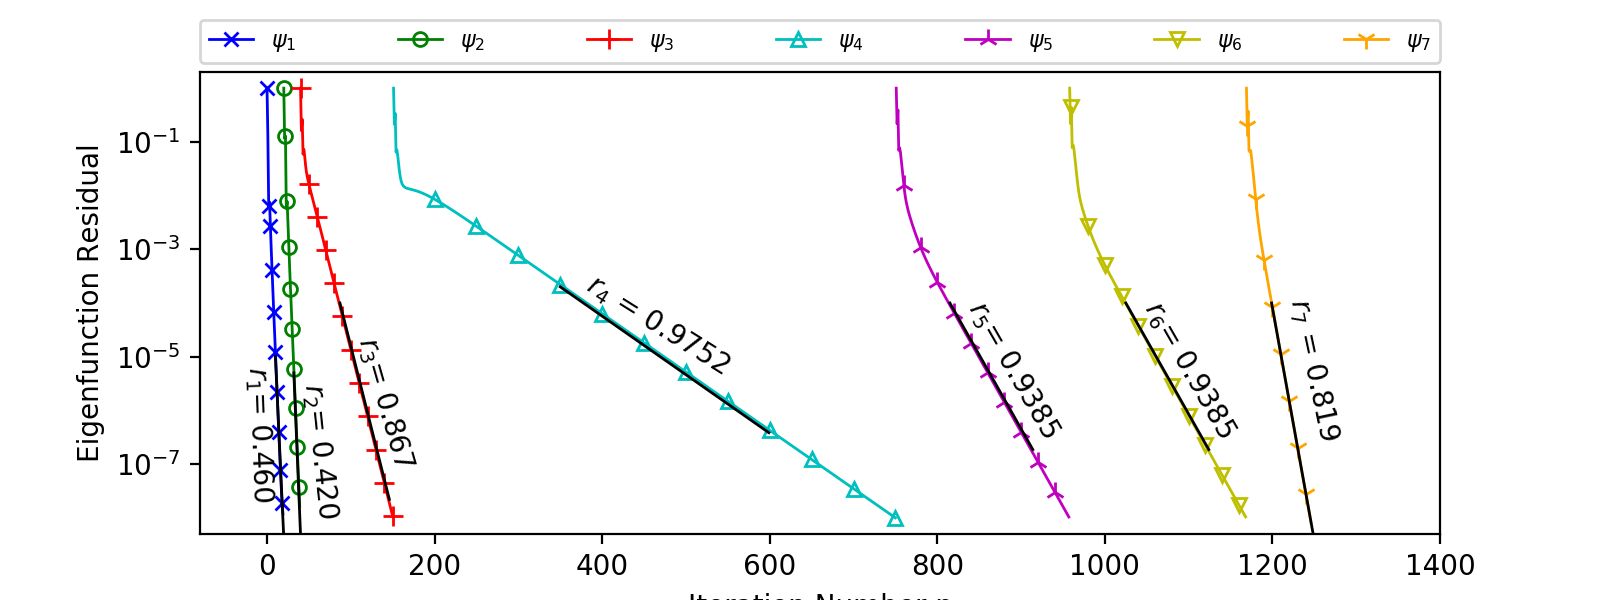

In [843]:
## Figure 8: Without Anderson Acceleration of Fixed Point
# Load Data
try:
    resultsDir = '/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/GIconvergence/'
    file = 'noAnderson_GREEN_661625.csv'
#     file='CO_rootfindingTests_PowerIteratiton_LW5_500_GREEN_375500.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    nWavefunctions=7
    referenceEnergies = np.array( [   -1.871953147002199813e+01, -9.907188115343084078e+00,
                                  -1.075324514852165958e+00, -5.215419985881135645e-01,
                                  -4.455527567163568570e-01, -4.455527560478895199e-01,
                                  -3.351419327004790394e-01
                            ] )

    ## Filling residual and error 
    residualsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    # print(np.shape(residualsMatrix))
    # print(np.shape(df.orbitalResiduals[0][1:-1].split()))
    errorsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempErrors = np.zeros((df.shape[0],nWavefunctions)) 
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    errorsMatrix1st = np.zeros((df.shape[0],nWavefunctions))
    # print('Starting at 1 instead of 0, this is for a Benzene dataframe that had different format in row 1.')
    # for i in range(1,df.shape[0]):
    for i in range(df.shape[0]):
    #     print('i = ', i)
        residualsMatrix[i,:] = np.array(df.orbitalResiduals[i][1:-1].split(),dtype=float)
        errorsMatrix[i,:] = abs( np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) - referenceEnergies )
        eigenvaluesMatrix[i,:] =  np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) 
    ##    errorsMatrix[i,:] = np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float)
        try:
            errorsMatrix1st[i,:] = np.array( df.energyErrorsWRTfirstSCF[i][1:-1].split(),dtype=float) 
        except AttributeError:
            pass

    for i in range(nWavefunctions):
        for j in range(df.shape[0]-1):
            if (residualsMatrix[j,i] - residualsMatrix[j+1,i]) != 0:
                tempResiduals[j,i] = min(1,residualsMatrix[j,i])
                tempErrors[j,i] = np.abs(errorsMatrix[j,i])
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
            else:
                tempResiduals[j,i] = None
                tempErrors[j,i] = None
                tempEigenvalues[j,i] = None
            if i ==nWavefunctions-1:
                tempResiduals[-1,i] = min(1,residualsMatrix[-1,i])
                tempErrors[-1,i] = errorsMatrix[-1,i]
                tempEigenvalues[-1,i] = eigenvaluesMatrix[-1,i]

            if i ==0:
                tempResiduals[0,i] = 1
                tempErrors[0,i] = errorsMatrix[0,i]
                tempEigenvalues[0,i] = eigenvaluesMatrix[0,i]


        df['residual'+str(i)] = tempResiduals[:,i]
        df['errors'+str(i)] = np.abs(tempErrors[:,i])
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
    
    
except Exception as e:
    print(e, 'Errors not computed properly.')
    
# Plotting functions
def plotFirstSCF(df,save=False):
    
    f0, (ax0) = plt.subplots(1,1, figsize=(8,3))

    default_cycler =(cycler(linewidth=[1,1,1,1,1,1,1])+
                    cycler(linestyle=['-','-','-','-','-','-','-']) + 
                    cycler('color', ('b','g','r','c','m','y','orange') )+
                    cycler(marker=['x','o','+','^','2','v','1'])+
                    cycler(markersize=[5,5,7,5,7,5,7])+
                    cycler(markevery=[2,2,10,50,20,20,10])  )

    
#                         cycler('color', 'bgrcmy orange') +

#     plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
#     if save=='CO_firstSCF_Anderson':
#         letter='b'
#     elif save=='CO_firstSCF_Power':
#         letter='a'
#     ax0.text(0.98, 0.05, letter, transform=ax0.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')
    
    
    for i in range(nWavefunctions):
        df.plot(y='residual'+str(i),ax=ax0,logy=True,fillstyle='none',label=r'$\psi_{%i}$' %(i+1),legend=True)

    
    # Line near psi1
    start = 10
    finish = start+20
    init = 1e-5
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init

    for i in range(1,finish-start):
        line[i] = line[i-1]*0.460
        idx[i] = idx[i-1]+1
    
    plt.text(start-40, line[0]/4, r"$r_1$= 0.460" , 
             rotation=-88)
    plt.semilogy(idx,line,'k-',linewidth=1)

    # Line near psi2
    start = 32
    finish = start+9 #120
    init = 5e-6
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init

    for i in range(1,finish-start):
        line[i] = line[i-1]*0.420
        idx[i] = idx[i-1]+1
    
    plt.text(start+5, line[0]/4, r"$r_2$= 0.420" , 
             rotation=-84)
    plt.semilogy(idx,line,'k-',linewidth=1)
    
    # Line near psi3
    start = 87
    finish = start+60 #120
    init = 1e-4
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init
    for i in range(1,finish-start):
        line[i] = line[i-1]*0.867
        idx[i] = idx[i-1]+1
        
    plt.text(start+15, line[0]/10, r"$r_3$= 0.867" , 
             rotation=-74)
    plt.semilogy(idx,line,'k-',linewidth=1)
    
    
    # Line near psi4
    start = 350
    finish = 600
    init = 2e-4
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init
    for i in range(1,finish-start):
#         line[i] = line[i-1]*0.976
        line[i] = line[i-1]*0.9752
        idx[i] = idx[i-1]+1
    
    mid = int(np.floor((finish-start)/2))
    plt.semilogy(idx,line,'k-', linewidth=1) 
    plt.text(start+25, line[0]/1.3, r"$r_4$ = 0.9752" , 
             rotation=-32)
    
    
    
    
    # Line near psi5 and psi6 
    start5 = 815
    start6 = 1025
    finish5 = start5+100 #120
    finish6 = start6+100 #120
    init = 1e-4
    
    line5 = np.zeros(finish5-start5)
    idx5 = np.empty(finish5-start5)
    idx5[0]=start5
    line5[0]=init
    line6 = np.zeros(finish6-start6)
    idx6 = np.empty(finish6-start6)
    idx6[0]=start6
    line6[0]=init
    for i in range(1,finish5-start5):
        line5[i] = line5[i-1]*0.9385
        line6[i] = line6[i-1]*0.9385
        idx5[i] = idx5[i-1]+1
        idx6[i] = idx6[i-1]+1
        
    plt.text(start5+15, line5[0]/2, r"$r_5$= 0.9385" , 
             rotation=-60)
    plt.text(start6+15, line6[0]/2, r"$r_6$= 0.9385" , 
             rotation=-60)
    plt.semilogy(idx5,line5,'k-',linewidth=1)
    plt.semilogy(idx6,line6,'k-',linewidth=1)
    
    
    
    # Line near psi7
    start = 1199
    finish = start+75
    init = 1e-4
    
    line = np.zeros(finish-start)
    idx = np.empty(finish-start)
    idx[0]=start
    line[0]=init
    for i in range(1,finish-start):
        line[i] = line[i-1]*0.819
        idx[i] = idx[i-1]+1
    
    mid = int(np.floor((finish-start)/2))
    plt.semilogy(idx,line,'k-', linewidth=1) 
    plt.text(start+15, line[0]/2, r"$r_7$ = 0.819" , 
             rotation=-78)
    
    

#     plt.legend()  
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=7, mode="expand", borderaxespad=0.,fontsize=8)
#     ax0.set_xlabel("Green's Iteration Number")
    ax0.set_xlabel("Iteration Number n")
    ax0.set_ylabel('Eigenfunction Residual')
    ax0.set_xlim([-80,1400])
#     ax0.set_xlim([140,800])
    ax0.set_ylim([5*10**(-9),2])
    

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
# plotFirstSCF(df,save='CO_firstSCF_Power')
plotFirstSCF(df,save='CO_firstSCF_Power_observed_rates')


<IPython.core.display.Javascript object>


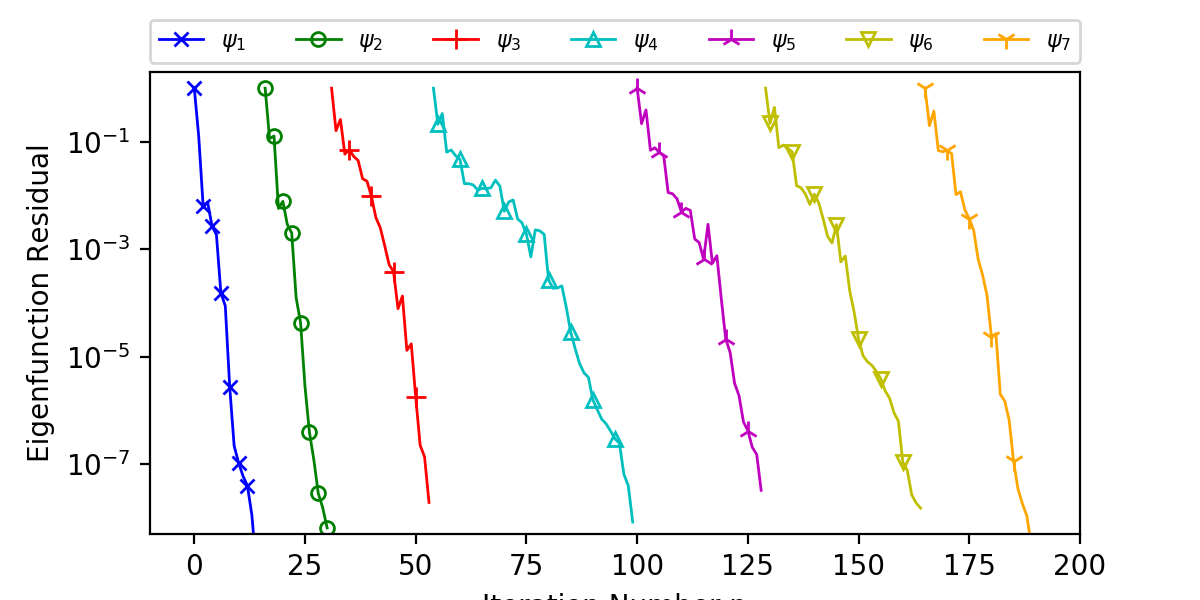

In [560]:
## Figure 9: With Anderson Acceleration of Fixed Point
# Load Data
try:
    resultsDir = '/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/GIconvergence/'
    file = 'yesAnderson_GREEN_661625.csv'
#     file='CO_rootfindingTests_andersonImmediately_LW5_500_GREEN_375500.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    nWavefunctions=7
    referenceEnergies = np.array( [   -1.871953147002199813e+01, -9.907188115343084078e+00,
                                  -1.075324514852165958e+00, -5.215419985881135645e-01,
                                  -4.455527567163568570e-01, -4.455527560478895199e-01,
                                  -3.351419327004790394e-01
                            ] )

    ## Filling residual and error 
    residualsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    # print(np.shape(residualsMatrix))
    # print(np.shape(df.orbitalResiduals[0][1:-1].split()))
    errorsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempErrors = np.zeros((df.shape[0],nWavefunctions)) 
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    errorsMatrix1st = np.zeros((df.shape[0],nWavefunctions))
    # print('Starting at 1 instead of 0, this is for a Benzene dataframe that had different format in row 1.')
    # for i in range(1,df.shape[0]):
    for i in range(df.shape[0]):
    #     print('i = ', i)
        residualsMatrix[i,:] = np.array(df.orbitalResiduals[i][1:-1].split(),dtype=float)
        errorsMatrix[i,:] = abs( np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) - referenceEnergies )
        eigenvaluesMatrix[i,:] =  np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) 
    ##    errorsMatrix[i,:] = np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float)
        try:
            errorsMatrix1st[i,:] = np.array( df.energyErrorsWRTfirstSCF[i][1:-1].split(),dtype=float) 
        except AttributeError:
            pass

    for i in range(nWavefunctions):
        for j in range(df.shape[0]-1):
            if (residualsMatrix[j,i] - residualsMatrix[j+1,i]) != 0:
                tempResiduals[j,i] = min(1,residualsMatrix[j,i])
                tempErrors[j,i] = np.abs(errorsMatrix[j,i])
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
            else:
                tempResiduals[j,i] = None
                tempErrors[j,i] = None
                tempEigenvalues[j,i] = None
            if i ==nWavefunctions-1:
                tempResiduals[-1,i] = min(1,residualsMatrix[-1,i])
                tempErrors[-1,i] = errorsMatrix[-1,i]
                tempEigenvalues[-1,i] = eigenvaluesMatrix[-1,i]

            if i ==0:
                tempResiduals[0,i] = 1
                tempErrors[0,i] = errorsMatrix[0,i]
                tempEigenvalues[0,i] = eigenvaluesMatrix[0,i]


        df['residual'+str(i)] = tempResiduals[:,i]
        df['errors'+str(i)] = np.abs(tempErrors[:,i])
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
    
    
except Exception as e:
    print(e, 'Errors not computed properly.')
    
# Plotting functions
def plotFirstSCF(df,save=False):
    
    f0, (ax0) = plt.subplots(1,1, figsize=(6,3))

#     default_cycler = cycler(linewidth=[3,2])* \
#                     cycler(markersize=[0.0])*cycler(linestyle=['-','--','-.',':']) + cycler('color', 'bgrcmykc')

    
    default_cycler =(cycler(linewidth=[1,1,1,1,1,1,1])+
                    cycler(linestyle=['-','-','-','-','-','-','-']) + 
                    cycler('color', ('b','g','r','c','m','y','orange')) +
                    cycler(marker=['x','o','+','^','2','v','1'])+
                    cycler(markersize=[5,5,7,5,7,5,7])+
                    cycler(markevery=[2,2,5,5,5,5,5])  )
#     plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
#     if save=='CO_firstSCF_Anderson':
#         letter='b'
#     elif save=='CO_firstSCF_Power':
#         letter='a'
#     ax0.text(0.98, 0.05, letter, transform=ax0.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')
    
    
    for i in range(nWavefunctions):
        df.plot(y='residual'+str(i),ax=ax0,logy=True,fillstyle="none",label=r'$\psi_{%i}$' %(i+1),legend=True)
    
#     ax0.set_xlabel("Green's Iteration Number")
    ax0.set_xlabel("Iteration Number n")
#     ax0.set_ylabel(r'$L_2$ Wavefunction Residual')
    ax0.set_ylabel(r'Eigenfunction Residual')
    ax0.set_xlim([-10,200])
    ax0.set_ylim([5*10**(-9),2])
    plt.legend()
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=7, mode="expand", borderaxespad=0.,fontsize=8)
    

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
plotFirstSCF(df,save='CO_firstSCF_Anderson')


<IPython.core.display.Javascript object>


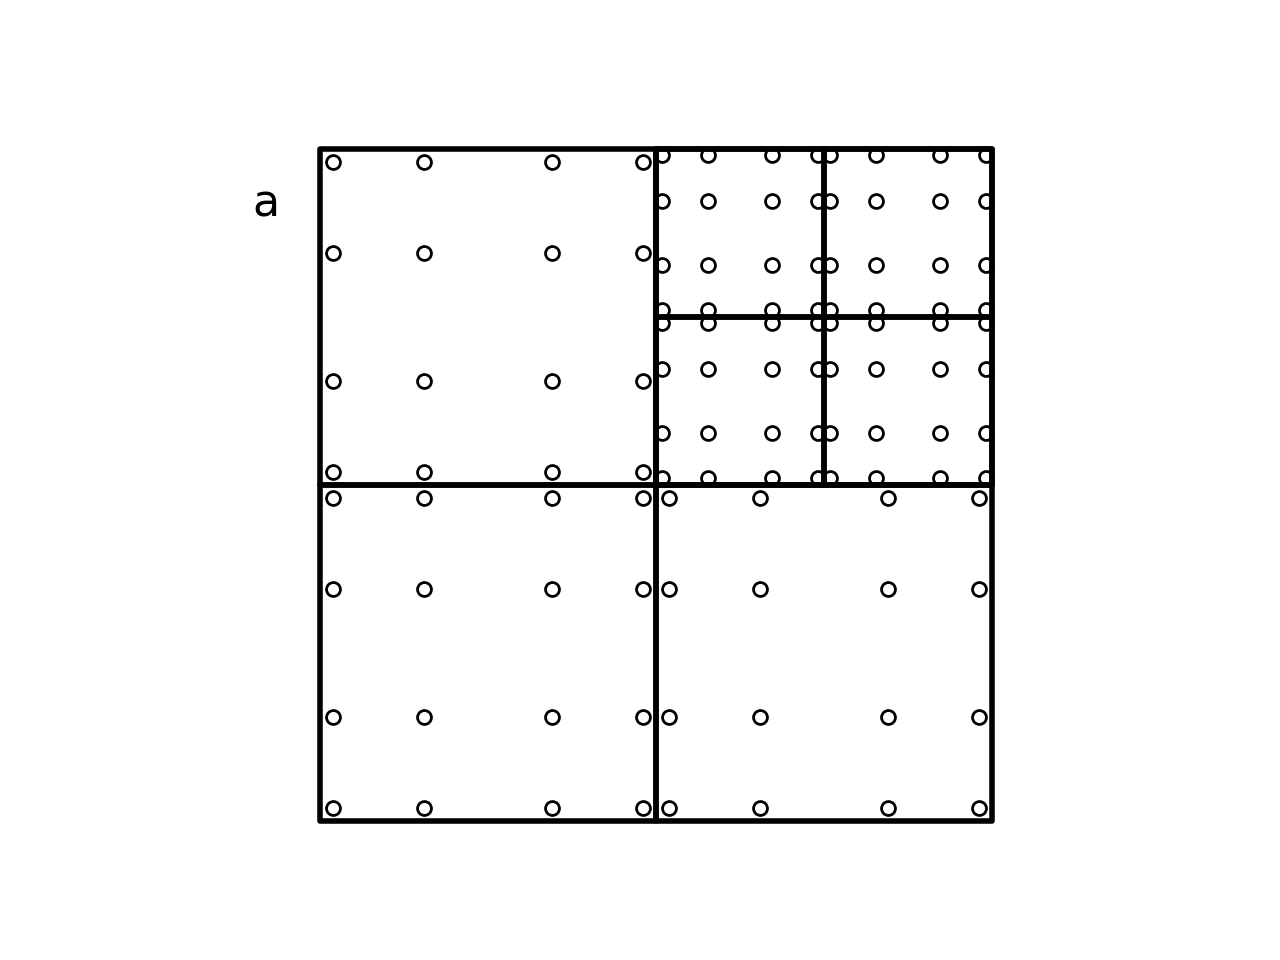

<IPython.core.display.Javascript object>


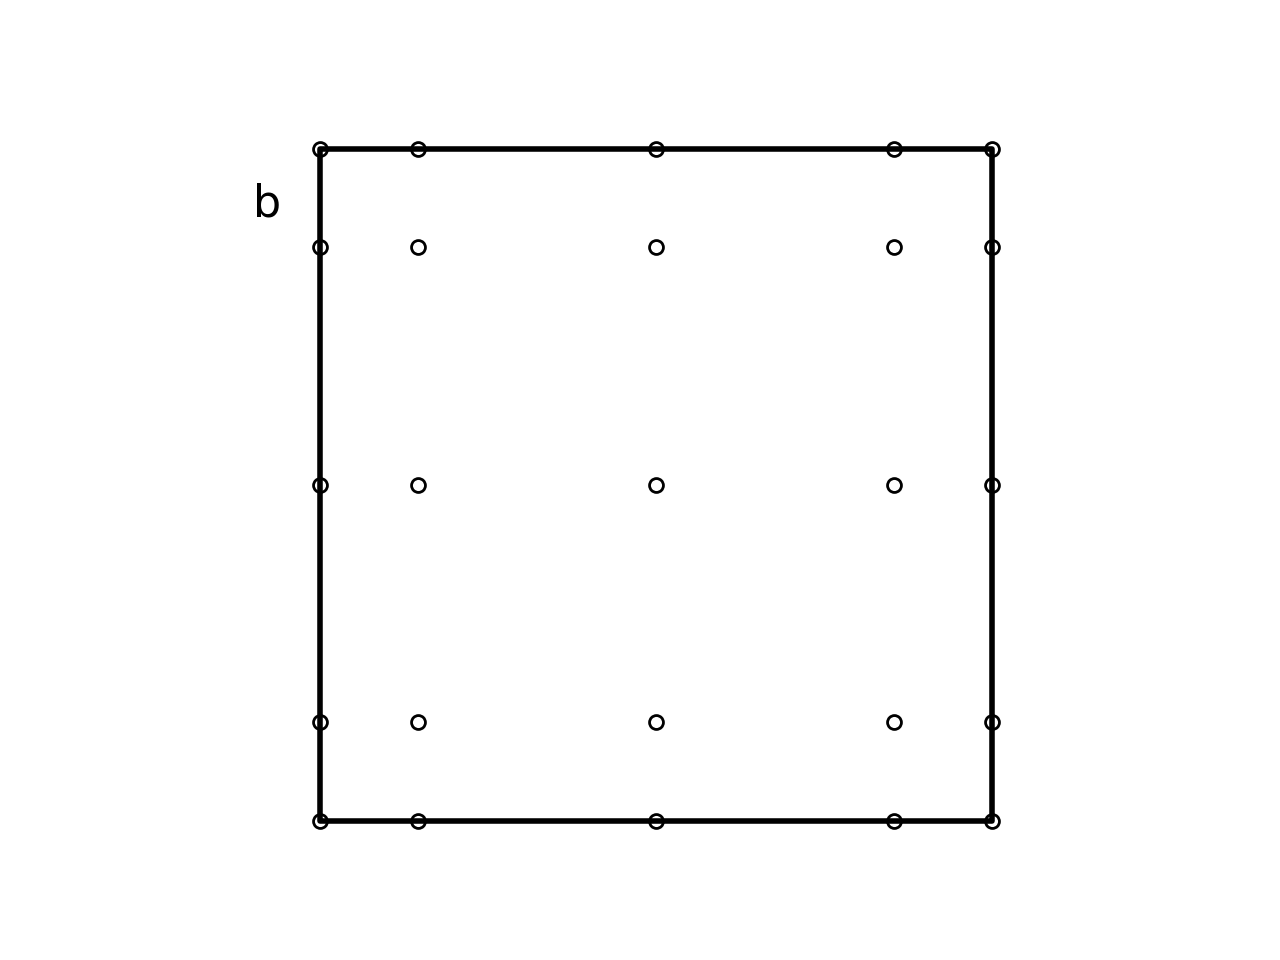

In [300]:
## Figure 10: Treecode cluster representation
import matplotlib.pyplot as plt
import matplotlib

def showMeshPlot(nodes, elements, values, quadPointsX, quadPointsY, letter, save=False):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_facecolor('none')
#         pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots()
    ax.set_aspect('equal')


    pc = quatplot(y,z, np.asarray(elements), values, ax=ax, 
             edgecolor="k",linewidth=2, cmap="rainbow")
    ax.plot(quadPointsX,quadPointsY,marker='o', fillstyle='none',color='k', ls='')
    plt.axis('off')
    plt.text(-0.1,0.9,letter,fontsize=16)
#     ax.set(title='This is the plot for: quad', xlabel='Y Axis', ylabel='Z Axis')

    if save != False:
        plt.savefig(figuresDir+save+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()
    
    
def addPoints1stKind(xPoints, yPoints, xmin, xmax, ymin, ymax, n):
    thetax = np.zeros(n+1)
    thetay = np.zeros(n+1)
    for i in range(n+1):
        thetax[i] = np.pi /(2*n+2) * (2*i+1)
        thetay[i] = np.pi /(2*n+2) * (2*i+1)
    
    x = np.cos(thetax) * (xmax-xmin)/2 + (xmax+xmin)/2
    y = np.cos(thetay) * (ymax-ymin)/2 + (ymax+ymin)/2
#     print(x)
#     print(y)

    for i in range(n+1):
        for j in range(n+1):
            xPoints = np.append(xPoints, x[i])
            yPoints = np.append(yPoints, y[j])
#     print(xPoints)
    return xPoints, yPoints

def addPoints2ndKind(xPoints, yPoints, xmin, xmax, ymin, ymax, n):
    thetax = np.zeros(n+1)
    thetay = np.zeros(n+1)
    for i in range(n+1):
        thetax[i] = np.pi /(n) * (i)
        thetay[i] = np.pi /(n) * (i)
    
    x = np.cos(thetax) * (xmax-xmin)/2 + (xmax+xmin)/2
    y = np.cos(thetay) * (ymax-ymin)/2 + (ymax+ymin)/2
#     print(x)
#     print(y)

    for i in range(n+1):
        for j in range(n+1):
            xPoints = np.append(xPoints, x[i])
            yPoints = np.append(yPoints, y[j])
#     print(xPoints)
    return xPoints, yPoints
    
    

nodes = np.array([[0,0], [0,0.5],[0,1],[0.5,0], 
                  [0.5,0.5], [0.5,1], [1,0],[1,0.5],
                  [1,1], [0.75,0.5],[1,0.75],[0.75,1],
                  [0.5,0.75],[0.75,0.75]])
elements = np.array([[0,3,4,1],[1,4,5,2],[3,6,7,4],[4,7,8,5],[4,9,13,12],[9,7,10,13],[13,10,8,11], [12,13,11,5]])
stresses = np.array([1,2,3,4,5,6,7,8])
stresses = np.array([0,0,0,0,0,0,0,0])

p=3
quadrature_x,quadrature_y = addPoints1stKind([],[],0,1,0,1,4)

x,y = addPoints1stKind([],[],0,0.5,0,0.5,p)
x,y = addPoints1stKind(x,y,0,0.5,0.5,1,p)
x,y = addPoints1stKind(x,y,0.5,1,0,0.5,p)

x,y = addPoints1stKind(x,y,0.5,0.75,0.5,0.75,p)
x,y = addPoints1stKind(x,y,0.5,0.75,0.75,1,p)
x,y = addPoints1stKind(x,y,0.75,1,0.5,0.75,p)
x,y = addPoints1stKind(x,y,0.75,1,0.75,1,p)


cluster_x,cluster_y = addPoints2ndKind([],[],0,1,0,1,4)
cluster_elements = np.array([[0,6,8,2]])
cluster_stresses = np.array([1])
showMeshPlot(nodes, elements, stresses, x, y, 'a', save='cluster-quadrature')
showMeshPlot(nodes, cluster_elements, cluster_stresses, cluster_x, cluster_y,'b',save='cluster-approx')


<IPython.core.display.Javascript object>


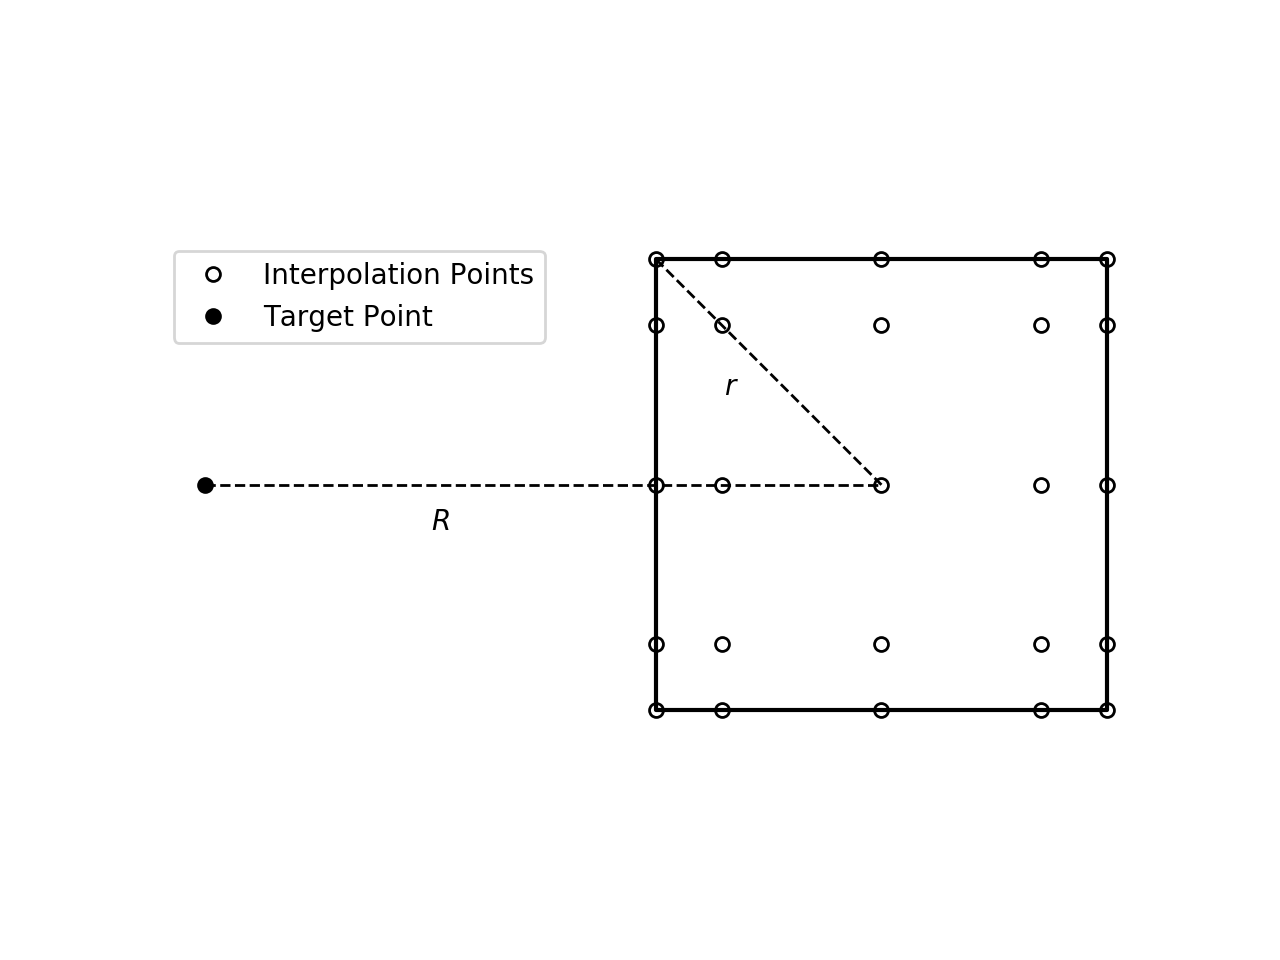

In [296]:
## Figure 11: Particle-cluster interaction
import matplotlib.pyplot as plt
import matplotlib
def showMeshPlot(nodes, elements, values, interpPointsX, interpPointsY, quadPointsX, quadPointsY,save=False):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_facecolor('none')
#         pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    default_cycler =(cycler(linewidth=[1])+
                    cycler(linestyle=['-']) + 
                    cycler('color', 'k') +
                    cycler(marker=['o'])+
                    cycler(markersize=[5])  )
#     plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=default_cycler)


    pc = quatplot(y,z, np.asarray(elements), values, ax=ax, 
             edgecolor="k",linewidth=1.5, cmap="rainbow")
    ax.plot(interpPointsX,interpPointsY,marker='o', fillstyle='none',color='k', ls='',label='Interpolation Points')
#     ax.plot(quadPointsX,quadPointsY,marker='x', fillstyle='none',color='r', ls='',label='Quadrature Points')
    
    # plot the target point
    ax.plot(-1,0.5,'ko',fillstyle='full',label='Target Point')
    ax.plot([-1, 0.5], [0.5, 0.5], color='k', linestyle='--', linewidth=1,markersize=0)
    plt.text(-0.5,0.4,r'$R$',rotation=0)
    ax.plot([0, 0.5], [1, 0.5], color='k', linestyle='--', linewidth=1,markersize=0)
#     plt.text(0.15,0.7,r'$\mathbf{r}$',rotation=-45)
    plt.text(0.15,0.7,r'$r$',rotation=0)
    
    plt.axis('off')
    plt.legend()
#     ax.set(title='This is the plot for: quad', xlabel='Y Axis', ylabel='Z Axis')

    if save != False:
        plt.savefig(figuresDir+save+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()
    
def addPoints1stKind(xPoints, yPoints, xmin, xmax, ymin, ymax, n):
    thetax = np.zeros(n+1)
    thetay = np.zeros(n+1)
    for i in range(n+1):
        thetax[i] = np.pi /(2*n+2) * (2*i+1)
        thetay[i] = np.pi /(2*n+2) * (2*i+1)
    
    x = np.cos(thetax) * (xmax-xmin)/2 + (xmax+xmin)/2
    y = np.cos(thetay) * (ymax-ymin)/2 + (ymax+ymin)/2
#     print(x)
#     print(y)

    for i in range(n+1):
        for j in range(n+1):
            xPoints = np.append(xPoints, x[i])
            yPoints = np.append(yPoints, y[j])
#     print(xPoints)
    return xPoints, yPoints

def addPoints2ndKind(xPoints, yPoints, xmin, xmax, ymin, ymax, n):
    thetax = np.zeros(n+1)
    thetay = np.zeros(n+1)
    for i in range(n+1):
        thetax[i] = np.pi /(n) * (i)
        thetay[i] = np.pi /(n) * (i)
    
    x = np.cos(thetax) * (xmax-xmin)/2 + (xmax+xmin)/2
    y = np.cos(thetay) * (ymax-ymin)/2 + (ymax+ymin)/2
#     print(x)
#     print(y)

    for i in range(n+1):
        for j in range(n+1):
            xPoints = np.append(xPoints, x[i])
            yPoints = np.append(yPoints, y[j])
#     print(xPoints)
    return xPoints, yPoints
    
def make_legend(save=False):
    fig, ax = plt.subplots(figsize=(2,6))
    ax.set_axis_off()
    legend_elements = [Line2D([0], [0], color='r', lw=1, label='Line'),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='g', markersize=15),
                   Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]
    lw=0
    legend_elements = [Line2D([0], [0], color='k', linewidth=lw, linestyle='-', marker='o',label='Target Particle'),
                       Line2D([0], [0], color='k', linewidth=lw, linestyle='-', marker='x', fillstyle='none', label='Source Particles'),
                       Line2D([0], [0], color='r', linewidth=lw, linestyle='-', marker='o', label='Chebyshev Points'),
                       ]
    
    
#     ax.legend('--o', 'label1')
    ax.legend(handles=legend_elements, loc='center')
    if save != False:
        saveID = save
        print('Saving figure to: ', plotsDir+saveID+'.png')
        plt.savefig(plotsDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()  

nodes = np.array([[0,0], [0,0.5],[0,1],[0.5,0], 
                  [0.5,0.5], [0.5,1], [1,0],[1,0.5],
                  [1,1], [0.75,0.5],[1,0.75],[0.75,1],
                  [0.5,0.75],[0.75,0.75]])
elements = np.array([[0,3,4,1],[1,4,5,2],[3,6,7,4],[4,7,8,5],[4,9,13,12],[9,7,10,13],[13,10,8,11], [12,13,11,5]])
stresses = np.array([1,2,3,4,5,6,7,8])
stresses = np.array([0,0,0,0,0,0,0,0])

p=3
x,y = addPoints1stKind([],[],0,0.5,0,0.5,p)
x,y = addPoints1stKind(x,y,0,0.5,0.5,1,p)
x,y = addPoints1stKind(x,y,0.5,1,0,0.5,p)

x,y = addPoints1stKind(x,y,0.5,0.75,0.5,0.75,p)
x,y = addPoints1stKind(x,y,0.5,0.75,0.75,1,p)
x,y = addPoints1stKind(x,y,0.75,1,0.5,0.75,p)
x,y = addPoints1stKind(x,y,0.75,1,0.75,1,p)


cluster_x,cluster_y = addPoints2ndKind([],[],0,1,0,1,4)
cluster_elements = np.array([[0,6,8,2]])
cluster_stresses = np.array([1])
showMeshPlot(nodes, cluster_elements, cluster_stresses, cluster_x, cluster_y, x, y, save='particle-cluster-approx')


'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


<IPython.core.display.Javascript object>


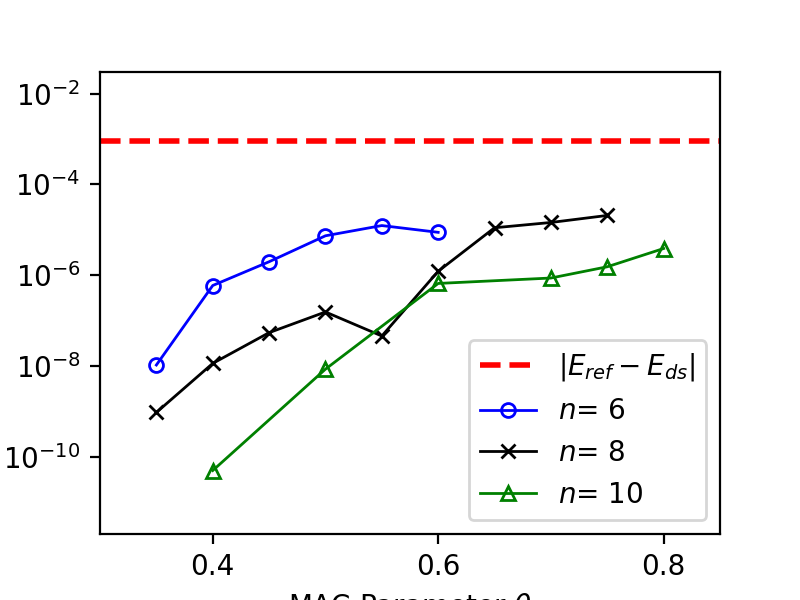

In [272]:
## Figure 12: Treecode Approximation Error
# Load Data
try:
    file='runComparison.csv'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/treecodeApproxError_sizeCheck_titan/'
    df = pd.read_csv(resultsDir+file, header=0)
    df = df.loc[df['treecodeOrder']!=0]
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    # # Direct sum computed with tight tolerance as well. 
#     TotalEnergy = -113.9340079923
    BandEnergy = -64.2042031442 
    HartreeEnergy = 76.3637784007
    ExchangeEnergy = 0.0
    CorrelationEnergy = 0.0
    KineticEnergy = 0.0

    ## Direct Sum after convergence
    # Orbital Energies:  [-19.2195498  -10.4072352   -1.57532224  -1.02155338  -0.94556439
    #   -0.94556439  -0.83513053]
    # Updated V_x:                           -15.9962398000 Hartree
    # Updated V_c:                           -1.0513854345 Hartree
    # Updated Band Energy:                   -62.8998398808 H, -1.1574390886e-03 H
    # Updated E_Hartree:                      76.1998782963 H, 1.5464962653e-03 H
    # Updated E_x:                           -11.9971798500 H, -1.6878041501e-04 H
    # Updated E_c:                           -0.9421486311 H, -4.5558249274e-06 H
    # Total Energy:                          -112.4732381331 H, -1.7948951001e-03 H
    # Energy Residual:                        1.262e-09
    # Density Residual:                       9.087e-06

    # Direct sum computed with tight tolerance as well. 
#     TotalEnergy = -112.4732381331
    # BandEnergy = -62.8998398808 
    # HartreeEnergy = 76.1998782963
    # ExchangeEnergy = 0.0
    # CorrelationEnergy = 0.0
    # KineticEnergy = 0.0

    
    
    # Total energy after first SCF
#     TotalEnergy=-112.5089958418
    # Total energy after SCF converges (may depend on the convergence criteria)
    TotalEnergy = -112.4732381331




    ## Fill error arrays

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
    df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
    df['absTotalEnergyErrorPerAtom'] = abs( df['TotalEnergy'] - TotalEnergy)/2
    df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')

    df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
    df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
    df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    
## Plotting functions
def treecodeApproximationError(df,A,B,C,discretizationError,save=False):
    
#     default_cycler = cycler(marker=['o', '^', 's',]) * cycler(linestyle=['-']) * cycler(fillstyle=['none','full']) + cycler('color', 'bgckmy')
    default_cycler = cycler(marker=['o', 'x', '^','1', 's',2]) * cycler(linestyle=['-']) * cycler(fillstyle=['none']) + \
                    cycler('color', 'bkgcky') +\
                    cycler(markersize=[5,5,5,7,5,5])
    

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    

    fig, ax = plt.subplots(figsize=(4,3))
    df = df.sort_values(by=B)
#     plt.axhline(y=discretizationError, color='r', linestyle='--', label='$|E_{DFT-FE}-E_{ds}|$')
    plt.axhline(y=discretizationError, color='r', linestyle='--',linewidth=2, label='$|E_{ref}-E_{ds}|$')
    
    grouped = df.groupby(C)
#     grouped.sort_values(C, ascending=False)
    for name,group in grouped:
#         group.plot(x=B, y=A, ax=ax, fillstyle='none', logy=True,label='$n$= %i'%(name))
        group.plot(x=B, y=A, ax=ax, logy=True,label='$n$= %i'%(name))
    plt.legend() 
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
#     plt.xlabel(r'$\theta$')
#     plt.xlabel(r'Multipole Acceptance Criterion $\theta$')
    plt.xlabel(r'MAC Parameter $\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Energy Error (Ha/atom)') 
#     plt.ylabel(r'$|E_{ds}-E_{tc}|$ (Ha/atom)') 
    
    plt.xlim([0.3, 0.85])
    plt.ylim([2e-12,3e-2])
    plt.legend(ncol=1)
#     plt.grid()
    
#     df.plot(x=B,y=C,style='o')
#     for label in ax.yaxis.get_ticklabels()[::2]:
#         label.set_visible(False)

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)
    plt.show()


# Plot call
df2 = df.loc[df['Treecode']==True]
df2 = df.loc[df['treecodeOrder'].isin([6,8,10])]
df2 = df2.loc[df2['totalIterationCount']>400]  # data set also contains runs for only first SCF iteration, which take about 200 Green iterations.
df2 = df2.loc[df2['theta']>0.31]  # data at theta=0.30 seems unreliable, well below the iteration tolerances
# treecodeAfterFirstSCF(df,'absBandEnergyError', 'theta', 'treecodeOrder')
# treecodeAfterFirstSCF(df,'absHartreeEnergyError', 'theta', 'treecodeOrder')
# treecodeAfterFirstSCF(df,'absTotalEnergyError', 'theta', 'treecodeOrder')
treecodeApproximationError(df2,'absTotalEnergyErrorPerAtom', 'theta','treecodeOrder',discretizationError=8.95e-4,save='treecode-approx-error')
# treecodeApproximationError(df2,'absTotalEnergyError', 'theta','treecodeOrder',save='treecode-approx-error-firstSCF')
# treecodeApproximationError(df2,'absTotalEnergyError', 'treecodeOrder','theta',save='treecode-approx-error-b')
# treecodeAfterFirstSCF(df,'absTotalEnergyError', 'treecodeOrder','theta',save='treecode-approx-error')
# df

# treecodeApproximationTime(df2,'timePerConvolution','absTotalEnergyError', 'treecodeOrder',save='treecode-approx-time')
# treecodeApproximationTime(df2,'totalTime','absTotalEnergyError', 'treecodeOrder',save='treecode-approx-time')

In [16]:
## Figure 13: Benzene density plots from visit

<IPython.core.display.Javascript object>


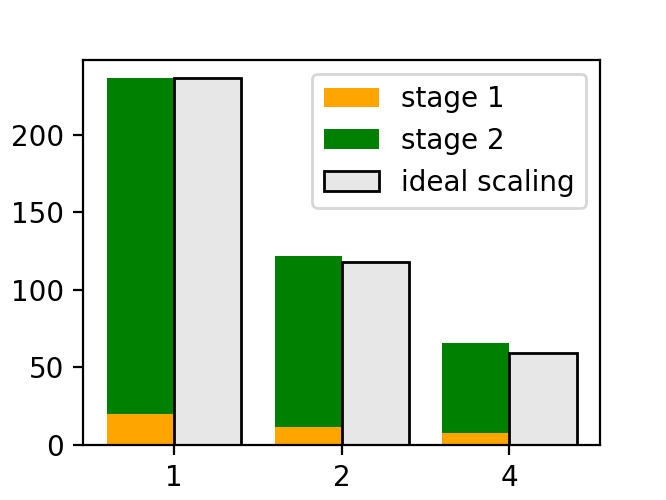

[236.230476 121.781434  65.628233]
Saving figure to:  /Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/parallel-scaling-bar.png


<IPython.core.display.Javascript object>


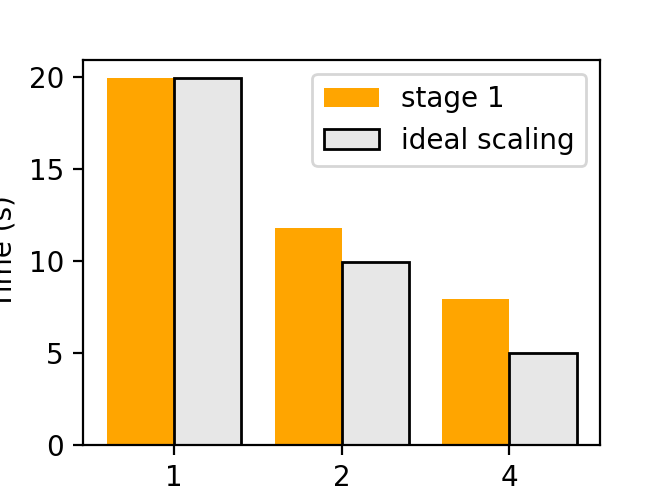

Saving figure to:  /Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/parallel-scaling-bar-precompute.png


<IPython.core.display.Javascript object>


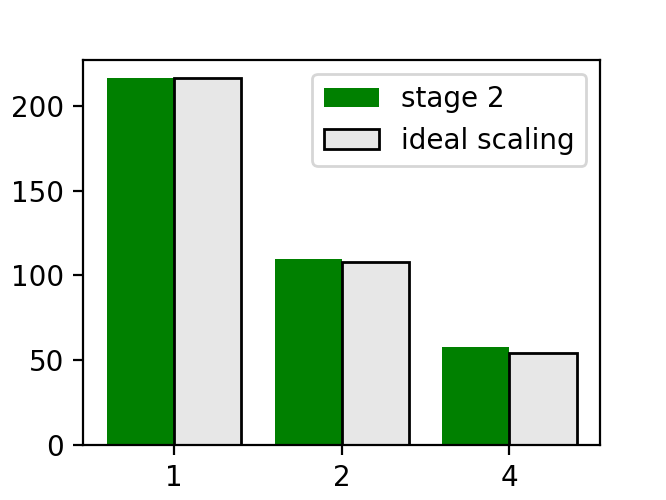

Saving figure to:  /Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/parallel-scaling-bar-treeeval.png


In [312]:
## Figure XX: SINGLE NODE Parallel Scalinng Bar Graphs

figuresDir='/Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/'


fig, ax = plt.subplots(figsize=(4/1.2,3/1.2))

# Data
N = 3
# treeEval = np.array([347.585305, 195.389359, 97.92982])
# modifiedWeights = np.array([8.762865, 5.540259, 3.969679])
# totalTime = np.array([356.34817,200.929618,101.899499])

# Titan times, order 7 theta 0.7 10M particles
# treeEval = np.array([433.708358, 231.853489, 125.900867])
# modifiedWeights = np.array([25.465363, 18.103506, 16.331417])

totalTime = np.array([459.173721, 249.956995, 142.232284])


# Using batch size and cluster size 2k
treeEval = np.array([216.290914,109.994984,57.686622])
modifiedWeights = np.array([19.939562,11.78645,7.941611])
totalTime = np.array([236.230476,121.781434,65.628233])

idealTreeEval = treeEval[0]*np.ones(3) / np.array([1,2,4])
idealModifiedWeights = modifiedWeights[0]*np.ones(3) / np.array([1,2,4])
idealTotalTime = totalTime[0]*np.ones(3) / np.array([1,2,4])
print(totalTime)
ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind-0.2, modifiedWeights, width, align='center', color=("orange"), label="stage 1")
p2 = plt.bar(ind-0.2, treeEval, width, align='center', color=("green"), bottom=modifiedWeights, label="stage 2")

# p3 = plt.bar(ind+0.25, idealModifiedWeights, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="Ideal Scaling",edgecolor='black')
# p4 = plt.bar(ind+0.25, idealTreeEval, width, align='center',color=(0.1, 0.1, 0.1, 0.1), bottom=idealModifiedWeights, label="Ideal Scaling",edgecolor='black')
p4 = plt.bar(ind+0.2, idealTotalTime, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="ideal scaling",edgecolor='black')
plt.text(-1.2,225,'c',fontsize=16)
# ax.annotate('100%', xy=(ind[0],totalTime[0]), fontsize=10, xytext=(-28,1), textcoords='offset points')
# ax.annotate('97%', xy=(ind[1],totalTime[1]), fontsize=10, xytext=(-25,1), textcoords='offset points')
# ax.annotate('90%', xy=(ind[2],totalTime[2]), fontsize=10, xytext=(-25,1), textcoords='offset points')
# plt.ylim([0,275])
plt.legend()
plt.xticks(ind, ('1', '2', '4'))
plt.ylabel('Time (s)')
plt.xlabel('Number of GPUs')

saveID='parallel-scaling-bar'
print('Saving figure to: ', figuresDir+saveID+'.png')
plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)

# treePercent=100*treeEval/totalTime
# weightsPercent=100*modifiedWeights/totalTime
# fig, ax = plt.subplots(figsize=(4,3))
# p1 = plt.bar(ind, weightsPercent, width, label="Precomputations")
# p2 = plt.bar(ind, treePercent, width, bottom=weightsPercent, label="Tree Evaluation")
# plt.legend()
# plt.xticks(ind, ('1', '2', '4'))
# plt.ylabel('Percentage of Total Time')
# plt.xlabel('Number of GPUs')
# plt.ylim([0,100])
# # p3 = plt.bar(ind, modifiedWeights, width)


fig, ax = plt.subplots(figsize=(4/1.2,3/1.2))
p1 = plt.bar(ind-0.2, modifiedWeights, width, align='center', color=("orange"), label="stage 1")
p3 = plt.bar(ind+0.2, idealModifiedWeights, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="ideal scaling",edgecolor='black')
plt.legend()
plt.text(-1.2,19.2,'a',fontsize=16)
# ax.annotate('100%', xy=(ind[0],modifiedWeights[0]), fontsize=10, xytext=(-28,1), textcoords='offset points')
# ax.annotate('85%', xy=(ind[1],modifiedWeights[1]), fontsize=10, xytext=(-25,1), textcoords='offset points')
# ax.annotate('63%', xy=(ind[2],modifiedWeights[2]), fontsize=10, xytext=(-25,1), textcoords='offset points')
# plt.ylim([0,23])

plt.xticks(ind, ('1', '2', '4'))
plt.ylabel('Time (s)')
plt.xlabel('Number of GPUs')
saveID='parallel-scaling-bar-precompute'
print('Saving figure to: ', figuresDir+saveID+'.png')
plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)

fig, ax = plt.subplots(figsize=(4/1.2,3/1.2))
p2 = plt.bar(ind-0.2, treeEval, width, align='center', color=("green"), label="stage 2")
p4 = plt.bar(ind+0.2, idealTreeEval, width, align='center',color=(0.1, 0.1, 0.1, 0.1), label="ideal scaling",edgecolor='black')
# ax.annotate('100%', xy=(ind[0],treeEval[0]), fontsize=10, xytext=(-28,1), textcoords='offset points')
# ax.annotate('98%', xy=(ind[1],treeEval[1]), fontsize=10, xytext=(-25,1), textcoords='offset points')
# ax.annotate('94%', xy=(ind[2],treeEval[2]), fontsize=10, xytext=(-25,1), textcoords='offset points')
# plt.ylim([0,250])
plt.legend()
plt.text(-1.2,205,'b',fontsize=16)
plt.xticks(ind, ('1', '2', '4'))
plt.ylabel('Time (s)')
plt.xlabel('Number of GPUs')
saveID='parallel-scaling-bar-treeeval'
print('Saving figure to: ', figuresDir+saveID+'.png')
plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=dpi_resolution)

In [17]:
###################################################################
##### BELOW ARE MISCELLANEOUS PLOTS THAT ARE NOT IN THE PAPER #####
###################################################################

<IPython.core.display.Javascript object>


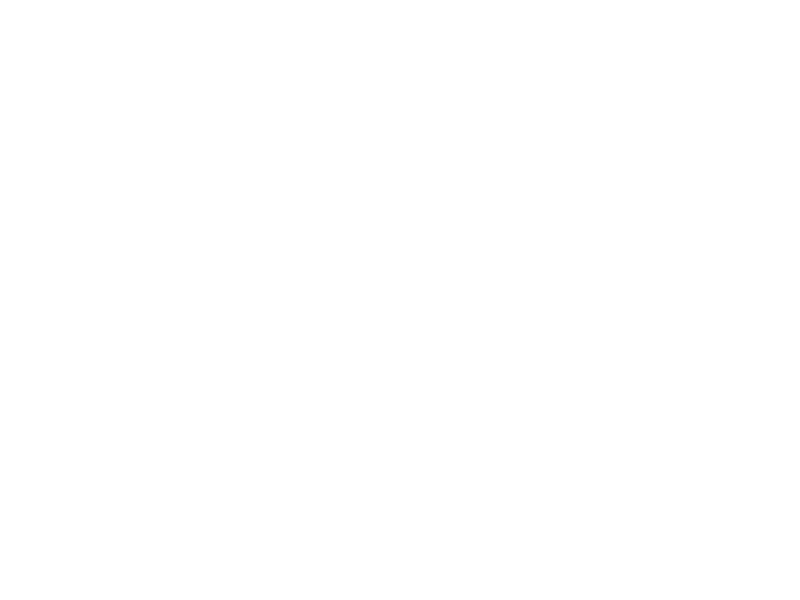

In [18]:
## Density mixing
# Load Data
try:
    fileAnderson='CO_Anderson_SCF_459500.csv'
    fileSimple='CO_Simple_SCF_459500.csv'
    fileNone='CO_None_SCF_459500.csv'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/mixing/'
    dfAnderson = pd.read_csv(resultsDir+fileAnderson, header=0)
    dfSimple = pd.read_csv(resultsDir+fileSimple, header=0)
    dfNone = pd.read_csv(resultsDir+fileNone, header=0)
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
    
def plot(dfA, dfS, dfN, save=False):
    default_cycler = cycler(marker=['o']) * cycler(linestyle=['-']) * cycler(fillstyle=['none']) * cycler('color', 'rgb')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    fig, ax = plt.subplots(figsize=(4,3))
    
    dfN.plot(x='Iteration', y='densityResidual', ax=ax, logy=True,label='No Mixing')
    dfS.plot(x='Iteration', y='densityResidual', ax=ax, logy=True,label='Simple Mixing')
    dfA.plot(x='Iteration', y='densityResidual', ax=ax, logy=True,label='Anderson Mixing')
    
    plt.xlabel("SCF Iteration Count")
    plt.ylabel("Density Residual")
    plt.legend(loc="center right")
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    
    plt.show()
    
    
 
plot(dfAnderson,dfSimple, dfNone, save='density-mixing')
    
    

<IPython.core.display.Javascript object>


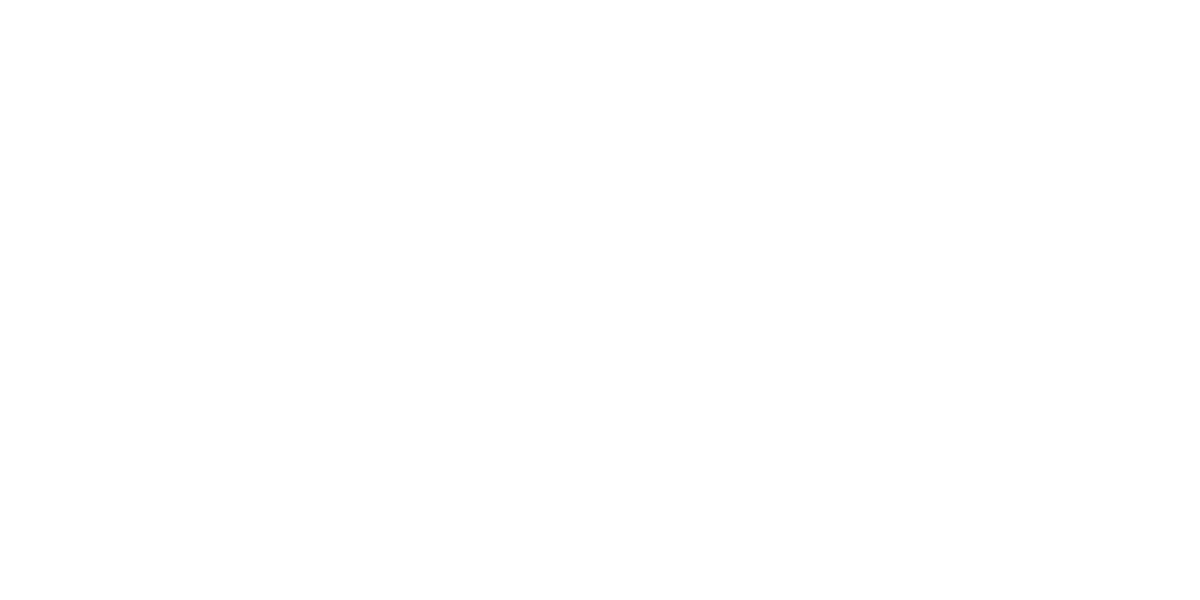

In [19]:
## Exploring residual plateau

# Load Data
try:
    resultsDir = '/Users/nathanvaughn/Documents/synchronizedDataFiles/noTreeTesting/'
    file = 'O2_degeneracy3_GREEN_382500.csv'
#     file='CO_rootfindingTests_andersonImmediately_LW5_500_GREEN_375500.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/fixedPointImplementation/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
#     df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
    nWavefunctions=10
    referenceEnergies = np.array( [   -1.871953147002199813e+01, -9.907188115343084078e+00,
                                  -1.075324514852165958e+00, -5.215419985881135645e-01,
                                  -4.455527567163568570e-01, -4.455527560478895199e-01,
                                  -3.351419327004790394e-01, 0,0,0
                            ] )

    ## Filling residual and error 
    residualsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempResiduals = np.zeros((df.shape[0],nWavefunctions))
    # print(np.shape(residualsMatrix))
    # print(np.shape(df.orbitalResiduals[0][1:-1].split()))
    errorsMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempErrors = np.zeros((df.shape[0],nWavefunctions)) 
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    tempEigenvalues = np.zeros((df.shape[0],nWavefunctions))
    errorsMatrix1st = np.zeros((df.shape[0],nWavefunctions))
    # print('Starting at 1 instead of 0, this is for a Benzene dataframe that had different format in row 1.')
    # for i in range(1,df.shape[0]):
    for i in range(df.shape[0]):
    #     print('i = ', i)
        residualsMatrix[i,:] = np.array(df.orbitalResiduals[i][1:-1].split(),dtype=float)
        errorsMatrix[i,:] = abs( np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) - referenceEnergies )
        eigenvaluesMatrix[i,:] =  np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float) 
    ##    errorsMatrix[i,:] = np.array( df.energyEigenvalues[i][1:-1].split(),dtype=float)
        try:
            errorsMatrix1st[i,:] = np.array( df.energyErrorsWRTfirstSCF[i][1:-1].split(),dtype=float) 
        except AttributeError:
            pass

    for i in range(nWavefunctions):
        for j in range(df.shape[0]-1):
            if (residualsMatrix[j,i] - residualsMatrix[j+1,i]) != 0:
                tempResiduals[j,i] = min(1,residualsMatrix[j,i])
                tempErrors[j,i] = np.abs(errorsMatrix[j,i])
                tempEigenvalues[j,i] = eigenvaluesMatrix[j,i]
            else:
                tempResiduals[j,i] = None
                tempErrors[j,i] = None
                tempEigenvalues[j,i] = None
            if i ==nWavefunctions-1:
                tempResiduals[-1,i] = min(1,residualsMatrix[-1,i])
                tempErrors[-1,i] = errorsMatrix[-1,i]
                tempEigenvalues[-1,i] = eigenvaluesMatrix[-1,i]

            if i ==0:
                tempResiduals[0,i] = 1
                tempErrors[0,i] = errorsMatrix[0,i]
                tempEigenvalues[0,i] = eigenvaluesMatrix[0,i]


        df['residual'+str(i)] = tempResiduals[:,i]
        df['errors'+str(i)] = np.abs(tempErrors[:,i])
        df['eigenvalue'+str(i)] = tempEigenvalues[:,i]
    
    
except Exception as e:
    print(e, 'Errors not computed properly.')
    
# Plotting functions
def plotFirstSCF(df,save=False):
    
    f0, (ax0) = plt.subplots(1,1, figsize=(6,3))

    default_cycler = cycler(linewidth=[3,2])* \
                    cycler(markersize=[0.0])*cycler(linestyle=['-','--','-.',':']) + cycler('color', 'bgrcmykc')

#     plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
#     if save=='CO_firstSCF_Anderson':
#         letter='b'
#     elif save=='CO_firstSCF_Power':
#         letter='a'
#     ax0.text(0.98, 0.05, letter, transform=ax0.transAxes,
#       fontsize=12, fontweight='bold', va='bottom', ha='right')
    
    
    for i in range(1):
        df.plot(y='residual'+str(i),ax=ax0,logy=True,label=r'$\psi_{%i}$' %(i+1),legend=True)
    
    ax0.set_xlabel("Green's Iteration Number")
    ax0.set_ylabel(r'$L_2$ Wavefunction Residual')
#     ax0.set_xlim([-10,220])
#     ax0.set_ylim([5*10**(-9),2])
    

    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()


# Plot call
plotFirstSCF(df)


In [20]:
## Plotting sqrt(density)
'''
Created on Jul 25, 2018

@author: nathanvaughn
'''
# import unittest
# import numpy as np
# import matplotlib
# # matplotlib.use('TkAgg')
# import matplotlib.pyplot as plt

import os
import sys
sys.path.append('../src/dataStructures')
sys.path.append('../src/utilities')

from AtomStruct import Atom
from TreeStruct_CC import Tree


def plotRadialData(atomicNumber):
    AtomicDataPath = '/Users/nathanvaughn/AtomicData/allElectron/z'+str(atomicNumber)+'/singleAtomData/'
    print(AtomicDataPath)
    print(os.listdir(AtomicDataPath))


    plt.figure()  
    data = np.genfromtxt(AtomicDataPath+'density.inp')
#         print('rho[0] = ', data[0,1])
    print('Number of points: ', len(data[:,1]))

#         plt.semilogy(data[:,0],data[:,1],label='Density')
    plt.plot(data[:,0],data[:,1],'k-',label='Density')
#     plt.plot(data[:,0],data[:,0],'o',label='Radial points')

#         r = data[:,0]
#         P = np.zeros_like(r)
#         k2 = np.sqrt(2*0.4)
#         for i in range(len(r)):
#             P[i] = piecewiseExp(r[i], 0.45, 2*atomicNumber, 2*k2, data[0,1])
#         plt.semilogy(r,P,label='Piecewise Exponential')

    plt.plot(data[:,0],np.sqrt(data[:,1]),'k-', linewidth=2,label='sqrt(Density)')
#         plt.plot(data[:,0],np.sqrt(data[:,1])*(1+1/data[:,0]),label='sqrt(Density)')
#         plt.plot(data[:,0],(data[:,1])*(1+1/data[:,0]),label='(Density)(1+1/r)')
#         plt.plot(data[:,0],(data[:,1])*(data[:,0]**2),label='(Density)*r**2')
#         plt.plot(data[:,0], data[0,1]*np.exp(-2*atomicNumber*data[:,0]), 'r-')
#         plt.plot(data[:,0], data[0,1]*np.exp(-2*np.sqrt(2*0.3)*atomicNumber*data[:,0]), 'k-')
    plt.legend()
#     plt.legend()
    plt.xlabel('radius')
    plt.show()
#         print(data[:,0])
    r=data[:,0]
    density=data[:,1]
#         print('\n\n\n')
#         print(data[:,1])
    left = 0
    right = 0
    for i in range(len(density)-1):
        left += density[i]*(r[i+1]-r[i])
        right += density[i+1]*(r[i+1]-r[i])
    trap = 1/2*(left+right)
    print('Left = ', left)    
    print('Right = ', right)
    print('Integrated density: ', trap)


# #         plt.figure() 
#           
    for orbital in os.listdir(AtomicDataPath):
        if orbital[:3]=='psi':
            Y = 1
            print(orbital)
            
            # ell, multiply by spherical harmonics constant corresponding to m=0
            if orbital[4]=='0':
                ell=int(orbital[4])
                Y *= 1/2 * np.sqrt((2*ell+1)/np.pi)
                style='-'
            elif orbital[4]=='1':
                ell=int(orbital[4])
                Y *= 1/2 * np.sqrt((2*ell+1)/np.pi)
                style='--'
            elif orbital[4]=='2':
                ell=int(orbital[4])
                Y *= 1/2 * np.sqrt((2*ell+1)/np.pi)
                style='-.'
            else:
                print(orbital[4])
                
            # n    
            if orbital[3]=='1':
#                 Y *= 1/2 * np.sqrt(1/np.pi)
                
                color='r'
            elif orbital[3]=='2':
#                 Y *= 1/2 * np.sqrt(3/np.pi)
                color='b'
            elif orbital[3]=='3':
#                 Y *= 1/4 * np.sqrt(5/np.pi)
                color='g'
            elif orbital[3]=='4':
#                 Y *= 1/2 * np.sqrt(7/np.pi)
                color='c'
            else:
                print(orbital[4])
            data = np.genfromtxt(AtomicDataPath+orbital)
#             Y = 1/2*1/np.sqrt(np.pi)
            if ( int(orbital[4]) + int(orbital[3])) < 4:
                plt.semilogy(data[:,0],np.abs(data[:,1])*Y,color+style,label=orbital[:-4])
#                 plt.semilogy(data[:,0],np.abs(data[:,1]**2),label=orbital[:-4]+' squared')
#                 plt.plot(data[:,0],np.sign(data[-1,1])*data[:,1],label=orbital[:-4])
#         xi = np.sqrt(2*0.2)
#         plt.plot(data[:,0], np.sqrt(xi**3/np.pi) *np.exp(-xi*atomicNumber*data[:,0]), 'r-')
#                 
#         
# #         data0 = np.genfromtxt(AtomicDataPath+'psi10.inp')
# #         r0 = data0[:,0]
# #         psi0 = data0[:,1]
# #         
# #         data1 = np.genfromtxt(AtomicDataPath+'psi20.inp')
# #         r1 = data1[:,0]
# #         psi1 = data1[:,1]
# #         [r0, phi0] = np.genfromtxt(AtomicDataPath+'psi10.inp')
# #         [r1, phi1] = np.genfromtxt(AtomicDataPath+'psi20.inp')
#         
# #         plt.figure()
# #         plt.plot(r0,psi0,'b',label='psi10')
# #         plt.plot(r1,psi1,'g',label='psi20')
    plt.xlim([0,3])
    plt.ylim([1e-6,1000])
    plt.legend()
    plt.xlabel('radius')
    plt.show()
        

        

plotRadialData(6)

/Users/nathanvaughn/AtomicData/allElectron/z6/singleAtomData/
['psi21.inp', 'psi20.inp', 'density.inp', 'psi10.inp']
Number of points:  401
Left =  11.13015947609247
Right =  10.721807372468088
Integrated density:  10.925983424280279
psi21.inp
psi20.inp
psi10.inp


/Users/nathanvaughn/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [21]:
## Investigating Gradient method
# Load Data
try:
    file='runComparison.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/OxygenData/gradientFree/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/gradientFree/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree/'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_preOrth/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_order5/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_lw5/'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/BerylliumData/gradientFree_domain40/'
    df = pd.read_csv(resultsDir+file, header=0)
    df['correctedOrder'] = df['order']-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
#     # Oxygen Atom DFT-FE 
#     TotalEnergy = -7.4469337501098821e+01
#     BandEnergy = -4.0613397710076626e+01 
#     HartreeEnergy = 36.32506036
#     ExchangeEnergy = 0.0
#     CorrelationEnergy = 0.0
#     KineticEnergy = 0.0
#     nAtoms=1

    
#     # CO Molecule DFT-FE 
# #     TotalEnergy = -112.47144323799400
# #     TotalEnergy = -112.47167888917213  # new
#     TotalEnergy = -112.471925162522 #newnewnew
#     BandEnergy = -6.2898682441673358e+01 
#     HartreeEnergy = 76.1983318
#     ExchangeEnergy = 0.0
#     CorrelationEnergy = 0.0
#     KineticEnergy = 0.0
# #     TotalEnergy=-112.47167888917213  # Tighter DFT-FE run
#     nAtoms=2
#     nWavefunctions=7
#     trueEigenvalues = [-1.871914961754098883e+01,-9.907098561099513034e+00,-1.075307096649917860e+00, 
#                        -5.215348395483176969e-01,-4.455546114762743981e-01,-4.455543309534727436e-01,
#                        -3.351421635719918912e-01]


# Beryllium Atom DFT-FE 
#     TotalEnergy = -1.4446201118081863e+01
    TotalEnergy = -14.44619576
#     TotalEnergy=-14.44619576
    BandEnergy = -8.1232305760491457e+00
#     HartreeEnergy = 36.32506036
#     ExchangeEnergy = 0.0
#     CorrelationEnergy = 0.0
#     KineticEnergy = 0.0
    nAtoms=1
    nWavefunctions=2
#     trueEigenvalues = [-3.855615417517944898e+00, -2.059998705089633453e-01]
    trueEigenvalues = [-3.855606700826773370e+00, -2.059973022514425267e-01]
    



#     print(df['orbitalEnergies'])

    df = df.loc[abs( df['TotalEnergy']-TotalEnergy) < 2 ]

    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
#     df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
#     try: 
#         df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
#     except Exception as e:
#         print(e, ' not present.')
#     df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
#     df['absTotalEnergyErrorPerAtom'] = abs( df['TotalEnergy'] - TotalEnergy-0.006)/nAtoms #/2 for CO molecule
    df['absTotalEnergyErrorPerAtom'] = abs( df['TotalEnergy'] - TotalEnergy)/nAtoms #/2 for CO molecule
#     df['absEig0Error'] = abs( df['orbitalEnergies'][0] - trueEigenvalues[0])
#     df['absEig1Error'] = abs( df['orbitalEnergies'][1] - trueEigenvalues[1])
    
#     print(df['orbitalEnergies'][0])
#     print(type(df['orbitalEnergies'][0]))
#     print(df['absEig0Error'])
    
#     df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
#     try: 
#         df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
#     except Exception as e:
#         print(e, ' not present.')

#     df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
#     df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
#     try: 
#         df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
#     except Exception as e:
#         print(e, ' not present.')
#     df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
#     df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
#     try: 
#         df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
#     except Exception as e:
#         print(e, ' not present.')
#     print(df.shape[0])
    eigenvaluesMatrix = np.zeros((df.shape[0],nWavefunctions))
    for i in range(df.shape[0]):
#         print('i = ', i)
#         if i>=17:
#         print(df.orbitalEnergies[i])
        eigenvaluesMatrix[i,:] = np.array(df.orbitalEnergies[i][1:-1].split(),dtype=float)
#         print(eigenvaluesMatrix[i,2])
#         if i>=17:
#             print(i)
#             print(eigenvaluesMatrix[i,:])
    print(eigenvaluesMatrix)
    print('here')
    for i in range(nWavefunctions):
#         print(i)
        df['absEig'+str(i)+'Error'] = abs( eigenvaluesMatrix[:,i] - trueEigenvalues[i])
#         print(df['absEig'+str(i)+'Error'])
#     df['absEig0Error'] = abs( eigenvaluesMatrix[:,0] - trueEigenvalues[0])
#     df['absEig1Error'] = abs( eigenvaluesMatrix[:,1] - trueEigenvalues[1])
        
        
except Exception as e:
    print(e, 'Errors not computed properly.')
    
    
    
# Plotting functions
def gradientEigenvalues(df,A,B,C,LL=True,save=False):
    df = df
#     print(df['absTotalEnergyErrorPerAtom'])
#     print(df)
    df=df.sort_values(by=['gradientFree'])
#     print(df['absTotalEnergyErrorPerAtom'])
    
#     print(df['divideParameter3'])
    
    default_cycler = cycler(color=['k']) * (cycler(marker=['o', '^','s'])) 
    default_cycler = cycler(marker=['o', '^','o','^']) * cycler(linestyle=['--']) + cycler('color', 'rrgg')
    # cycler('color', 'bgrcmyk')
#     print(default_cycler)

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)

    fig, ax = plt.subplots(figsize=(8,6))
    df = df.sort_values(by=B)
    orderGrouped = df.groupby('order')
    for nameO,groupO in orderGrouped:
        grouped = groupO.groupby(C)
    #     print(grouped)
    #     grouped.sort_values(C, ascending=False)
#         for method in ['Laplacian','Gradient','Gradient-Free','False','True']:
        for method in ['False','True']:
            if method=='True':
                c='g'
            if method=='False':
                c='b'
            if method=='Laplacian':
                c='r'
#         for method in ['False']:
            for name,group in grouped:
    #             print('init name = ', name, '. type: ', type(name))
                if name==True:
                    name='Gradient-Free'
                if name==False:
                    name='Gradient'
    #             print('final name = ', name, ', type: ', type(name))
                if name==method:
                    for i in range(nWavefunctions):
                        err = 'absEig'+str(i)+'Error'
                        group.plot(x=B, y=err, style=c, fillstyle='none', ax=ax, loglog=LL, label=r'$\varepsilon_%i$: %s; order %i'%(i,name,nameO))
#                     group.plot(x=B, y='absEig1Error', fillstyle='none', ax=ax, loglog=LL, label=r'$\varepsilon_1$: %s; order %i'%(name,nameO))
                else:
                    pass
#                     print("not plotting... name = %s but method = %s" %(name,method))
    plt.legend() 
    
#     ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.xlabel('Mesh Size ($N_M$)')
#     plt.xlabel(r'$\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Absolute Error (Ha)') 
#     plt.grid()
    
#     if LL==True:
# #         plt.xlim([1e5, 3e6])
#         plt.ylim([3e-5,1e-1])
# #     plt.grid()
    
#     df.plot(x='divideParameter3',y='batchSize',logx=True,style='o')
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()


# df = df.loc[df['absTotalEnergyErrorPerAtom']<10]
# df = df.loc[df['order']==4]
gradientEigenvalues(df,'absTotalEnergyErrorPerAtom','numberOfPoints','gradientFree',save='Be_gradient')

# gradientFree(df,'TotalEnergyError','numberOfPoints','gradientFree',LL=False,save='Be_gradient')

# print(df['divideParameter3'])
# print(df['gradientFree'])
# print(df['order'])

# df


[[-3.85656885 -0.20591435]
 [-3.85811286 -0.2063271 ]
 [        nan -0.20604177]
 [-3.85585821 -0.20598955]
 [-3.85706736 -0.20614446]
 [        nan -0.20597144]
 [-3.85574129 -0.20605635]
 [-3.8555021  -0.20601564]
 [        nan -0.20598886]
 [-3.85562212 -0.20602056]
 [-3.85538322 -0.20597949]
 [-3.85563963 -0.20601192]
 [-3.85540171 -0.20598492]
 [-3.85589799 -0.20599227]
 [-3.85639844 -0.2061293 ]
 [-3.85564812 -0.20602158]
 [-3.8553635  -0.20597937]
 [-3.85546446 -0.2059893 ]
 [-3.85544666 -0.20598323]]
here


In [22]:
## Figure 3: h versus p refinement for Beryllium
# Load Data
try:
    file='runComparison.csv'
#     resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/hRefinement/'
    resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/second-kind/Oxygen-sweep/'
    df = pd.read_csv(resultsDir+file, header=0)
    df;
    df['correctedOrder'] = df['order']#-1
except Exception as e:
    print(e, 'Data not loaded properly.')
    
## Set reference values, compute errors
try:
        ## Beryllium
#     TotalEnergy = -1.4446201118081863e+01
#     ExchangeEnergy = -2.2903921833555341e+00
#     CorrelationEnergy = -2.2343205529440757e-01
#     BandEnergy = -8.1232305760491457e+00
#     KineticEnergy =  1.4309060170370618e+01
#     ElectrostaticEnergy = -8.1232305760491457e+00
#     HartreeEnergy = 7.115210167512  # pc-4
    
        ## Oxygen
    TotalEnergy = -7.4469337501098821e+01
    ExchangeEnergy = 0
    CorrelationEnergy = 0
    BandEnergy = -4.0613397710076626e+01
    KineticEnergy =  0
    ElectrostaticEnergy = 0
    HartreeEnergy = 36.32506036  # pc-4
    


    df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
    df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
    df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
    df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')

    df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
    df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
    try: 
        df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
    except Exception as e:
        print(e, ' not present.')
    df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
    df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
    df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
    try: 
        df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
    except Exception as e:
        print(e, ' not present.')
except Exception as e:
    print(e, 'Errors not computed properly.')
    
# Plotting functions
def hRefinement(df,save=False):
    default_cycler = ( cycler(linestyle=['-','--']) * cycler(marker=['o', '^', 's',]) ) + cycler('color', 'bgrcmy')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
    
    
    
    df['maxError']=df[['absTotalEnergyError','absBandEnergyError','absHartreeEnergyError']].max(axis=1)
#     df = df.sort_values(by='numberOfPoints')
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    
    
    grouped = df.groupby('correctedOrder')
    for name,group in grouped:

#         group.plot(x='numberOfPoints', y='maxError', fillstyle='none', ax=ax, loglog=True,label='$p_{quad}$=%i'%(name))
        group.plot(x='numberOfPoints', y='absHartreeEnergyError', fillstyle='none', ax=ax, loglog=True,label='$p_{quad}$=%i'%(name))
#         group.plot(x='divideParameter3', y='maxError', fillstyle='none', ax=ax, loglog=True,label='Order %i'%(name))

    plt.legend(loc = 'best')
    plt.xlabel('Mesh Size ($N_M$)')
    plt.ylabel('Maximum Absolute Error (Ha)')
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
    plt.grid()
    
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()


# Plot call
    
df=df.sort_values(by=['divideParameter3'])
hRefinement(df,save='beryllium-h-verus-p')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.
